In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [61]:
test_df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/InternshipProjects/Project-Housing_splitted/test.csv')
train_df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/InternshipProjects/Project-Housing_splitted/train.csv')

In [62]:
print("Train set size:",train_df.shape)
print("Test set size:",test_df.shape)

Train set size: (1168, 81)
Test set size: (292, 80)


We have 1168 rows and 80 features and 1 target variable in the train set and 292 records in the test set.

In [63]:
train_df['SourceType']="Train"
test_df['SourceType']="Test"

In [64]:
df_list=[train_df,test_df]
combined_df=pd.concat(df_list)

In [65]:
combined_df.shape

(1460, 82)

In [335]:
combined_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SourceType
0,120,3,70.049958,4928,1,0,3,4,0,13,...,0,0,0,0,2,2007,8,4,128000.0,1
1,20,3,95.000000,15865,1,0,3,4,1,12,...,0,224,0,0,10,2007,8,4,268000.0,1
2,60,3,92.000000,9920,1,0,3,1,0,15,...,0,0,0,0,6,2007,8,4,269790.0,1
3,20,3,105.000000,11751,1,0,3,4,0,14,...,0,0,0,0,1,2010,0,4,190000.0,1
4,20,3,70.049958,16635,1,0,3,2,0,14,...,0,0,0,0,6,2009,8,4,215000.0,1


In [67]:
combined_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SourceType
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,Train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,Train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,Train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,Train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,Train


In [68]:
combined_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [69]:
combined_df.isna().sum()[:10]

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [70]:
train_df.isna().sum()[0:40]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [71]:
train_df.isna().sum()[40:82]

HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       551
GarageType         64
GarageYrBlt        64
GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1161
Fence             931
MiscFeature      1124
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
SourceType          0
dtype: int64

The features Alley, PoolQC,MiscFeature and Fence are having more than 50% of missing values.

In [72]:
train_df['Alley'].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [73]:
train_df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [74]:
train_df['MiscFeature'].value_counts()

Shed    40
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64

In [75]:
train_df['Fence'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [76]:
train_df['FireplaceQu'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

Let's drop the features which are missing more than 50% of the data. Also we will drop ID field as its unique identification number.

In [77]:
combined_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Id'],axis=1,inplace=True)

In [78]:
train_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Id'],axis=1).isna().sum()[0:40]

MSSubClass        0
MSZoning          0
LotFrontage     214
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        7
MasVnrArea        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinSF1        0
BsmtFinType2     31
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
dtype: int64

In [79]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemod

In [80]:
non_num_col=[]
numeric_col=[]
for col in combined_df.columns:
    if combined_df[col].dtype=='object':
        non_num_col.append(col)
    else:
        numeric_col.append(col)
print("Non Numeric columns: ",non_num_col,'\n')
print("Numeric columns: ",numeric_col)

Non Numeric columns:  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SourceType'] 

Numeric columns:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

In [81]:
for col in numeric_col:
    print(col)
    print("=============================")
    print(combined_df[col].value_counts(),'\n')


MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
153.0      1
144.0      1
39.0       1
168.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64 

LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
6858      1
13005     1
8910      1
17104     1
8190      1
Name: LotArea, Length: 1073, dtype: int64 

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64 

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64 

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1904     1
1898     1
1893     1
1882     1
2010     1
N

Observations:
1. Categorized data features - MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,
2. Date features - YearBuilt,YearRemodAdd,MoSold,YrSold, YearBuilt,GarageYrBlt

In [82]:
type(non_num_col)

list

In [83]:
categorical_columns=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']

In [84]:
for x in categorical_columns:
    numeric_col.remove(x)
print(numeric_col)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [85]:
categorical_columns.extend(non_num_col)
print(categorical_columns)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'SourceType']


In [86]:
for col in categorical_columns:
    print(col)
    print("=============================")
    print(combined_df[col].value_counts(),'\n')

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64 

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64 

BsmtFullBath
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64 

BsmtHalfBath
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64 

FullBath
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64 

HalfBath
0    913
1    535
2     12
Name: HalfBath, dtype: int64 

BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64 

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64 

TotRm

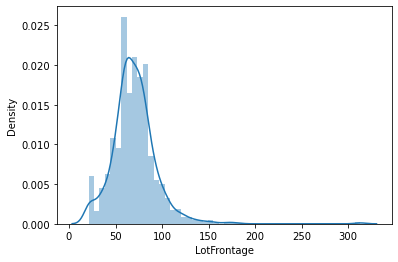

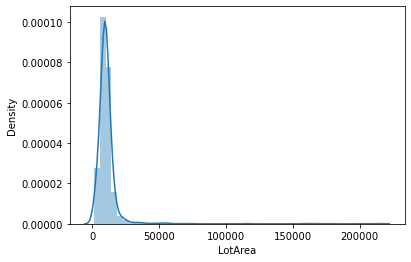

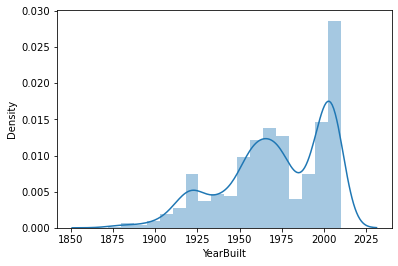

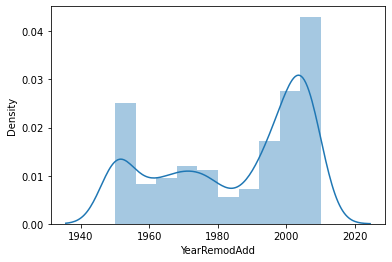

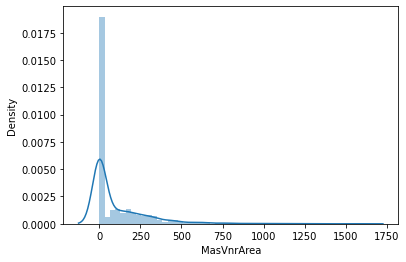

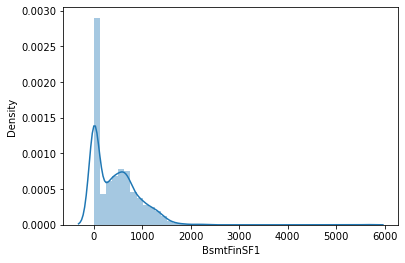

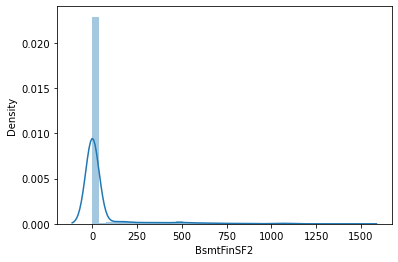

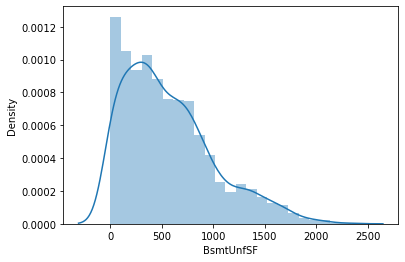

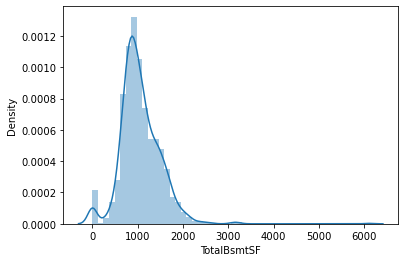

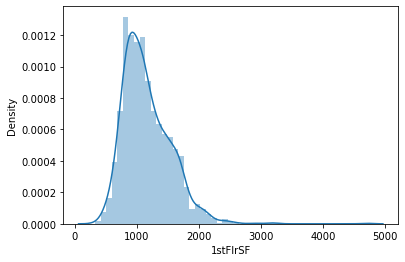

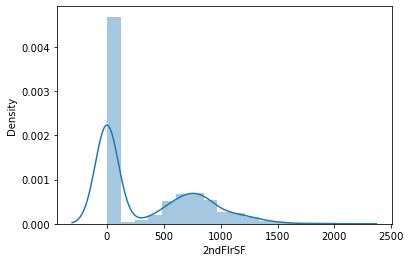

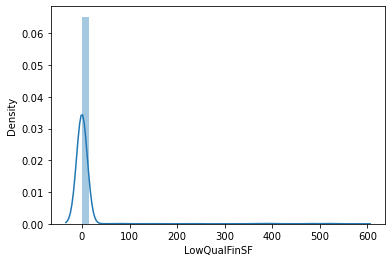

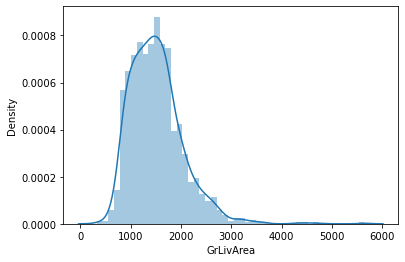

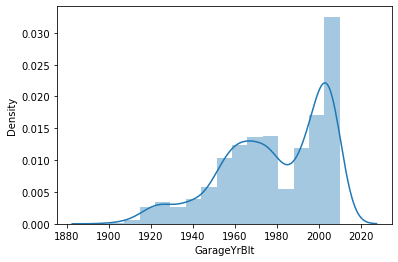

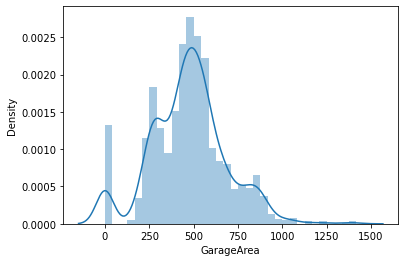

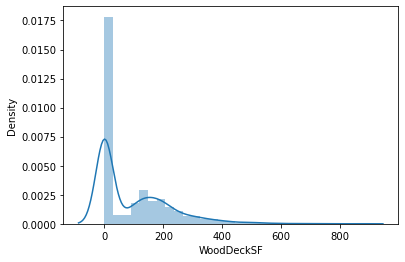

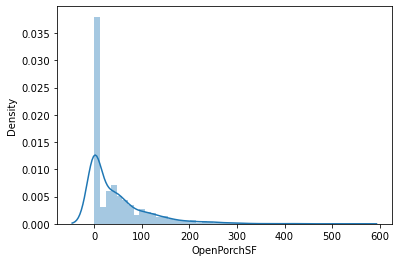

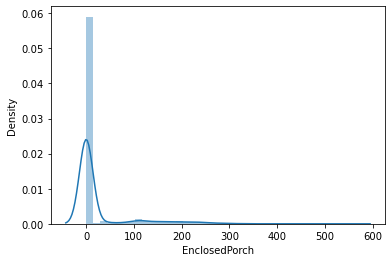

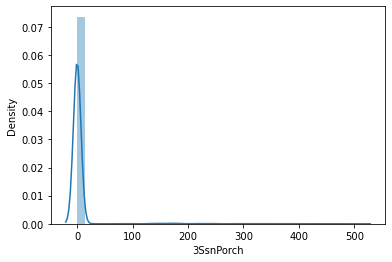

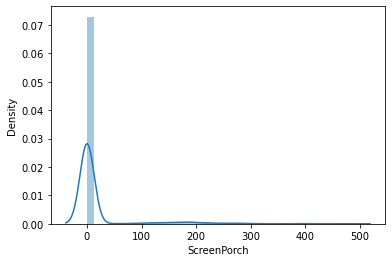

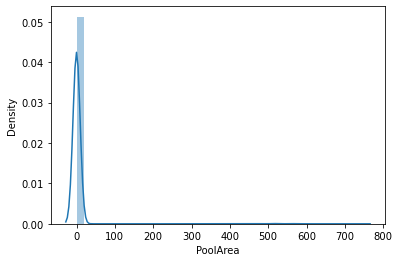

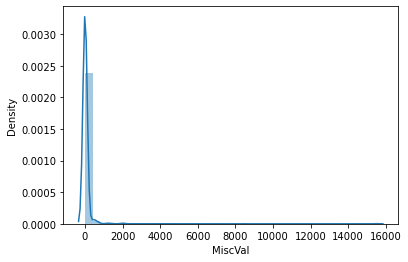

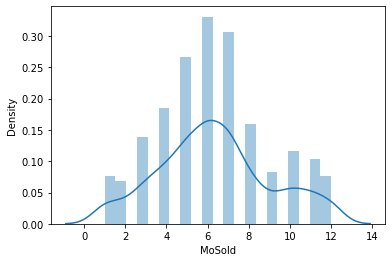

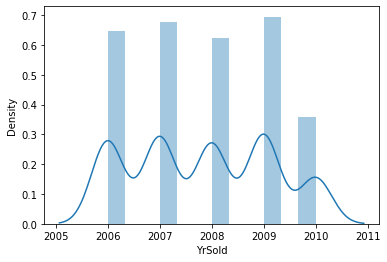

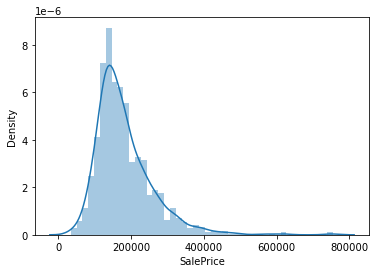

In [87]:
for col in numeric_col:
    sns.distplot(combined_df[col])
    plt.show()

Not all the data are normally distributed. We have skewness with many of the features.

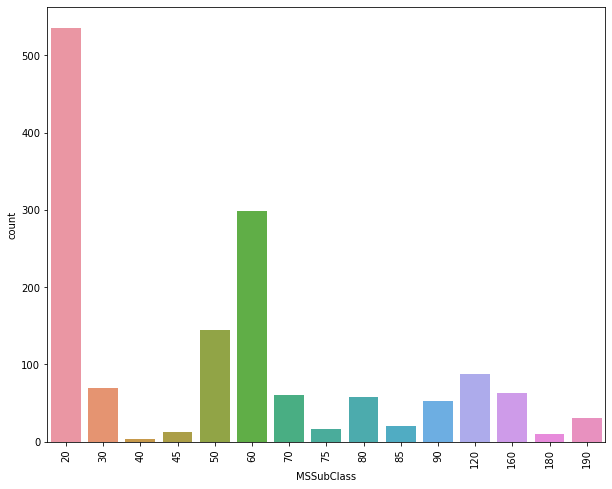

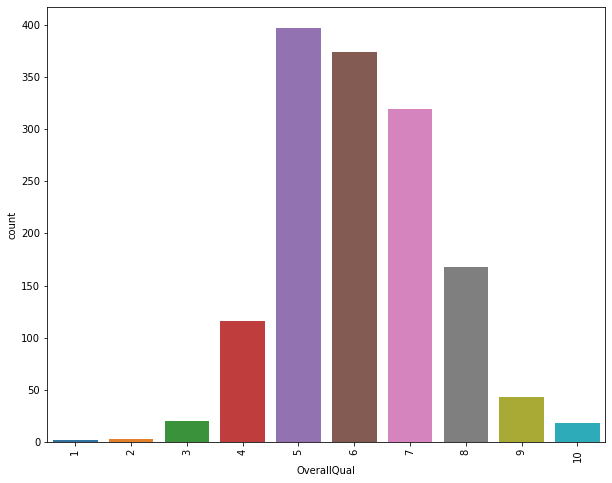

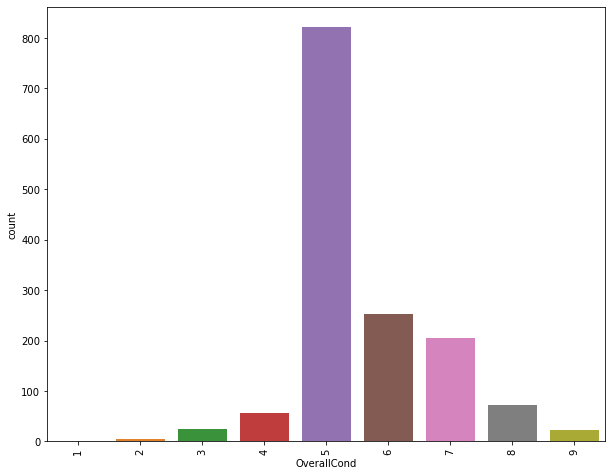

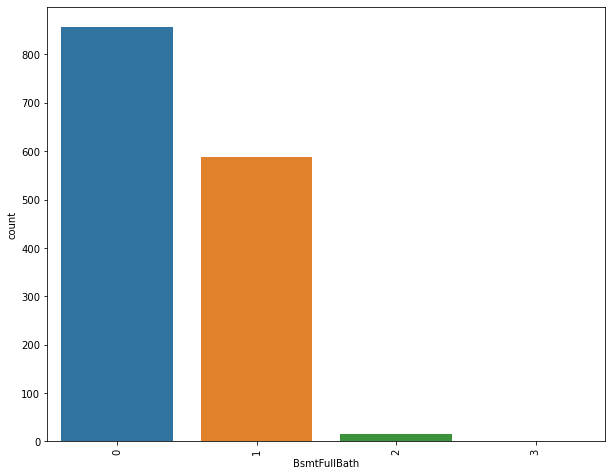

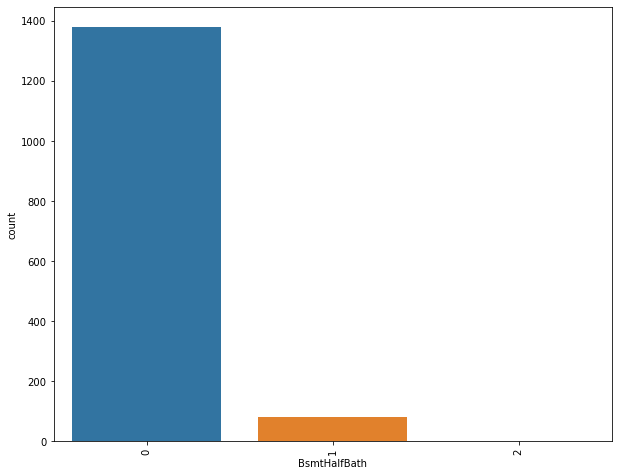

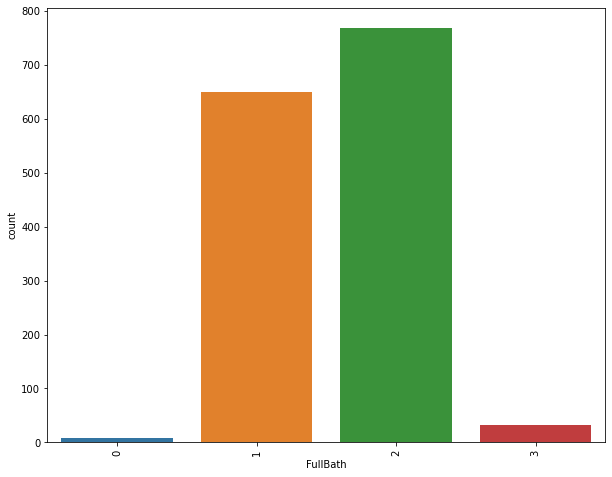

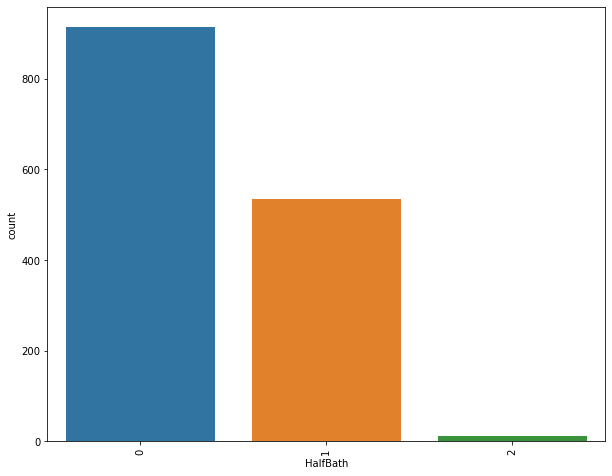

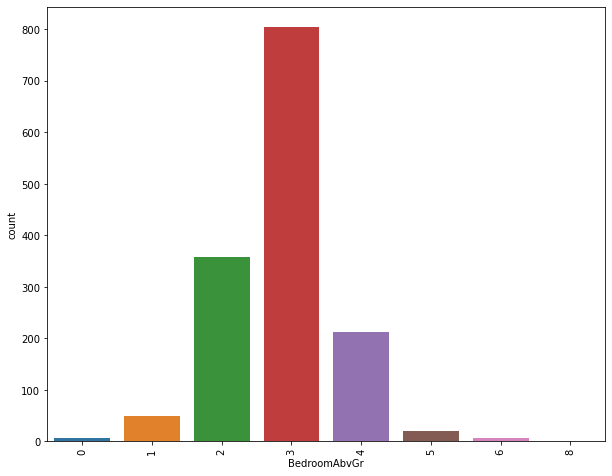

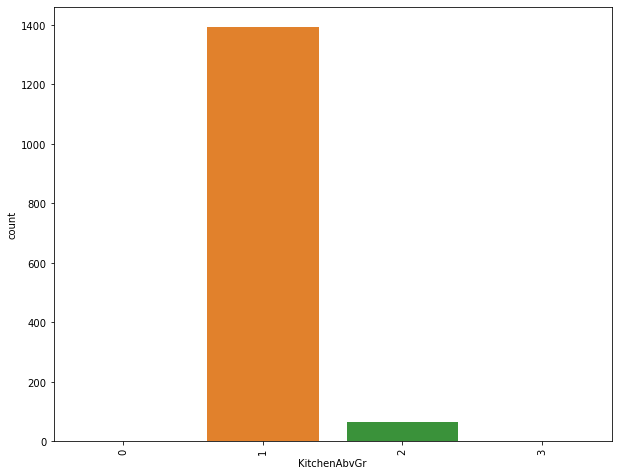

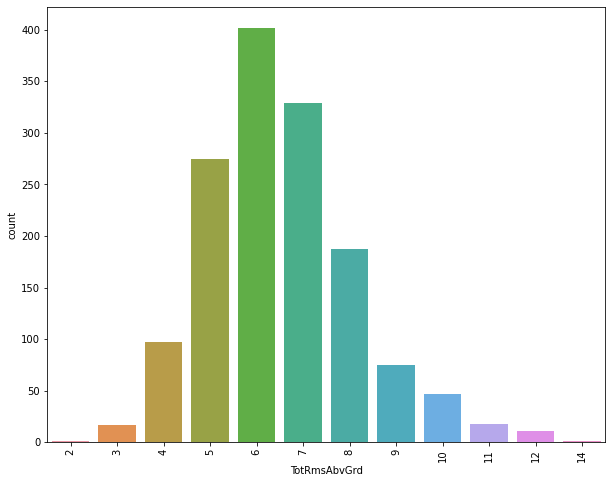

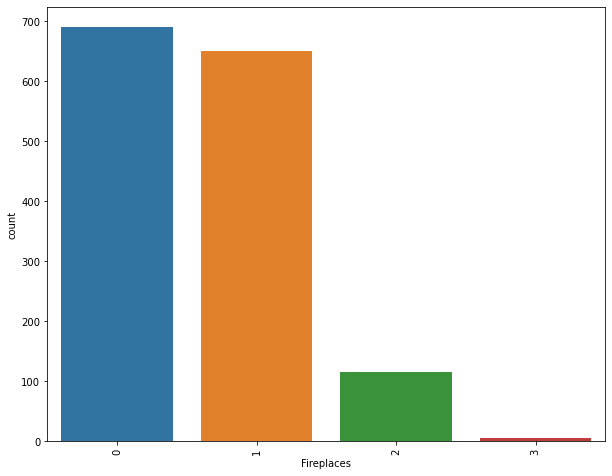

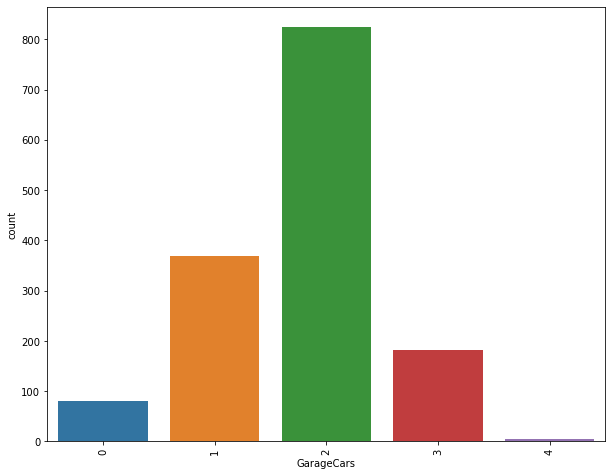

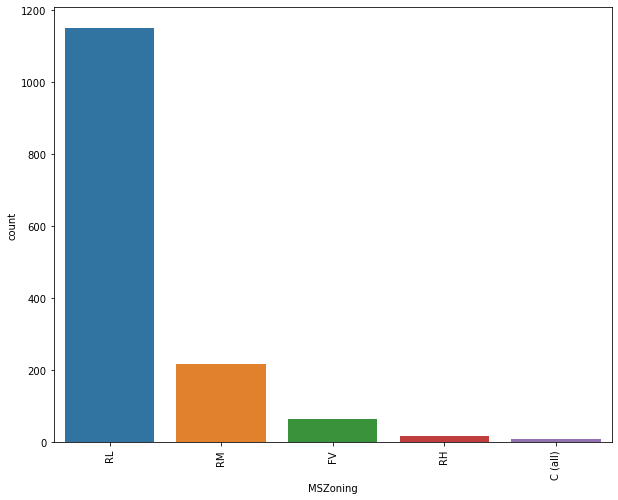

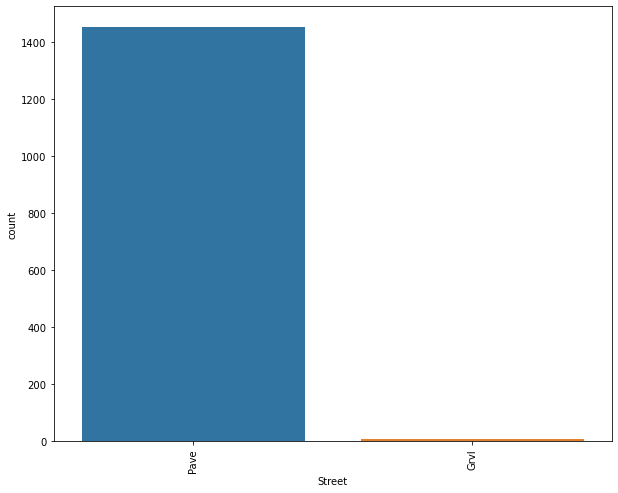

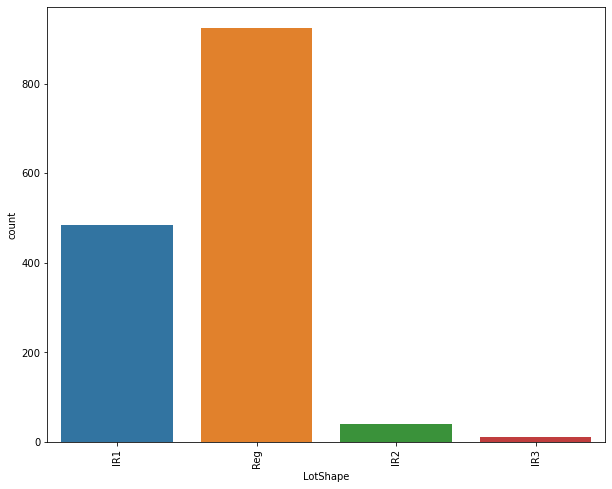

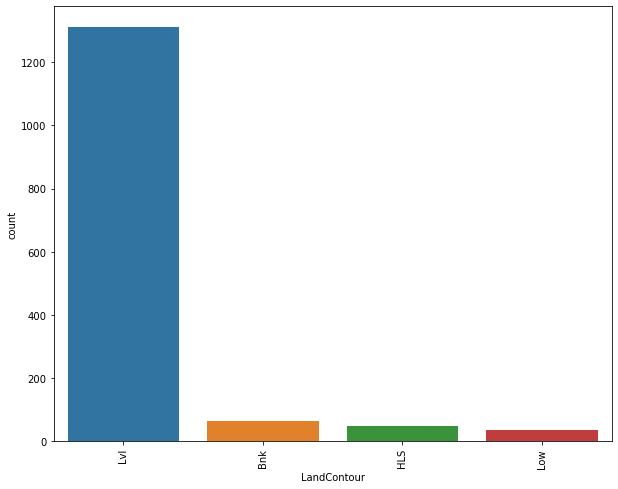

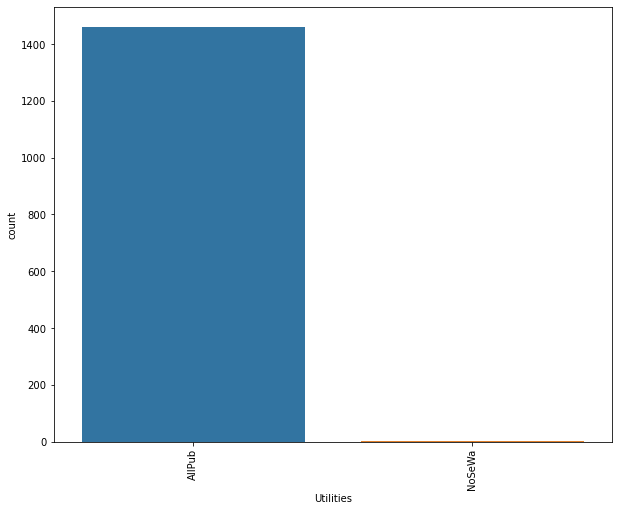

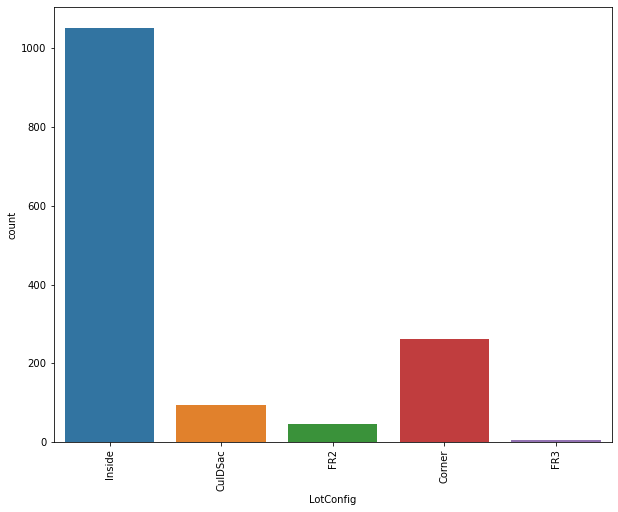

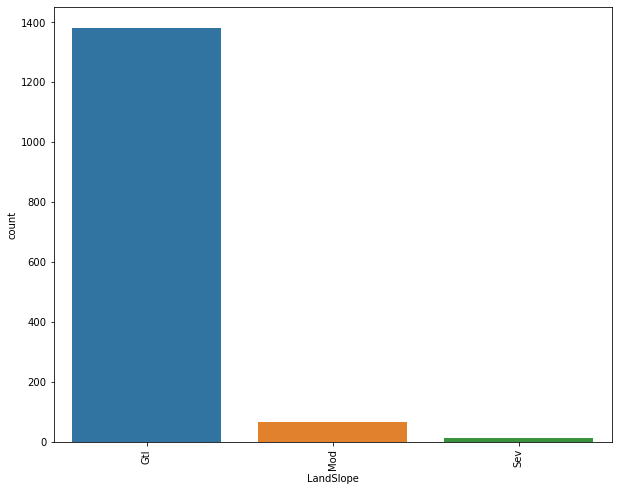

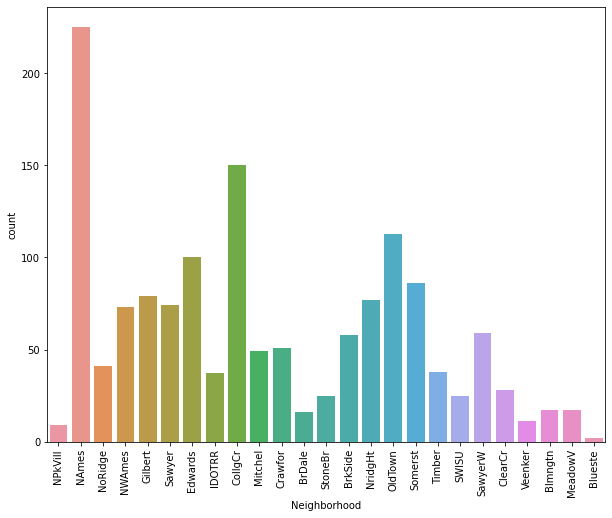

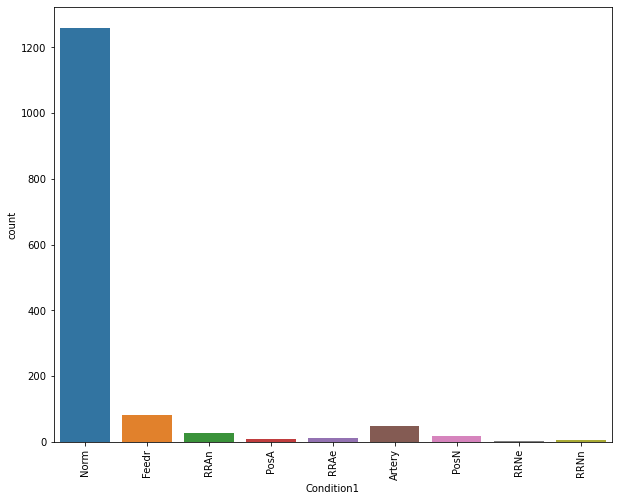

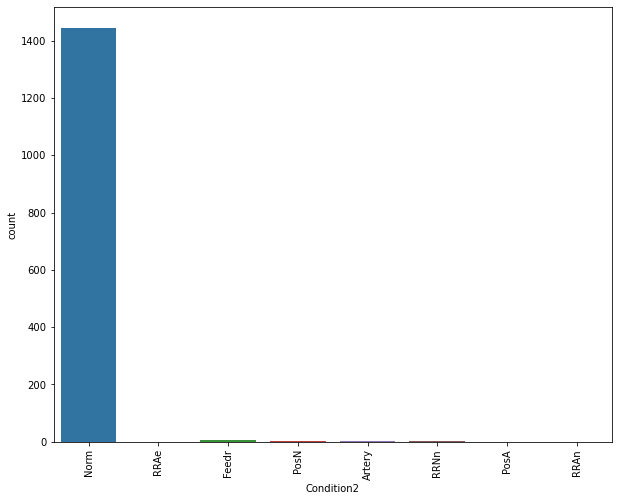

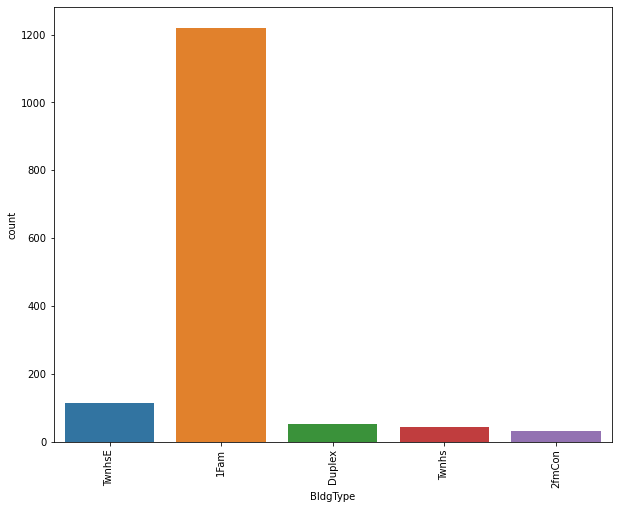

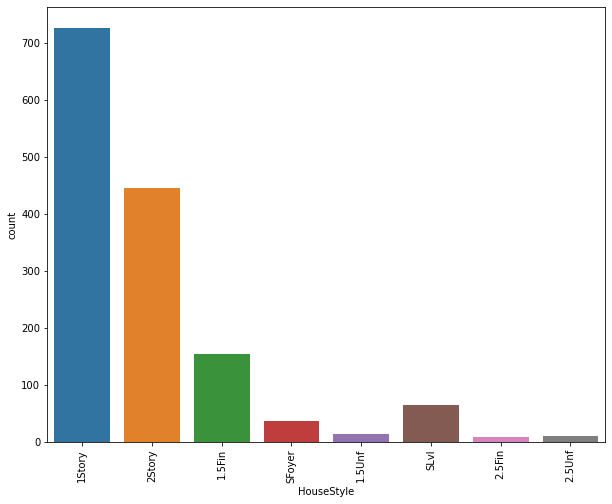

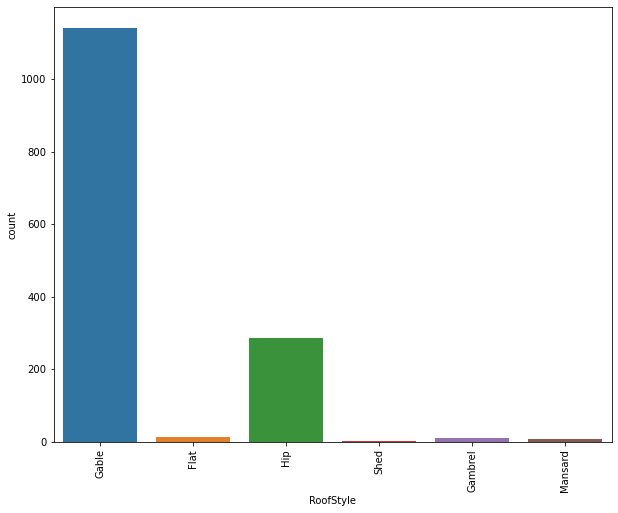

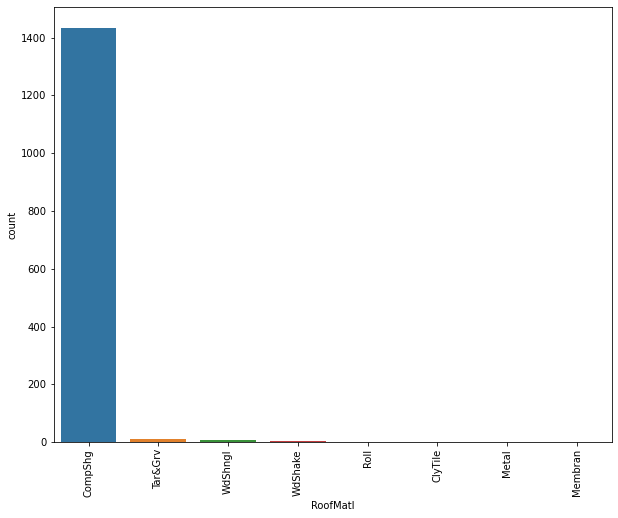

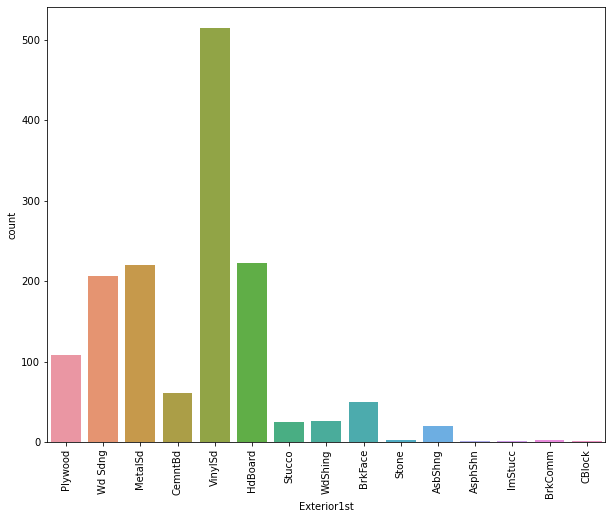

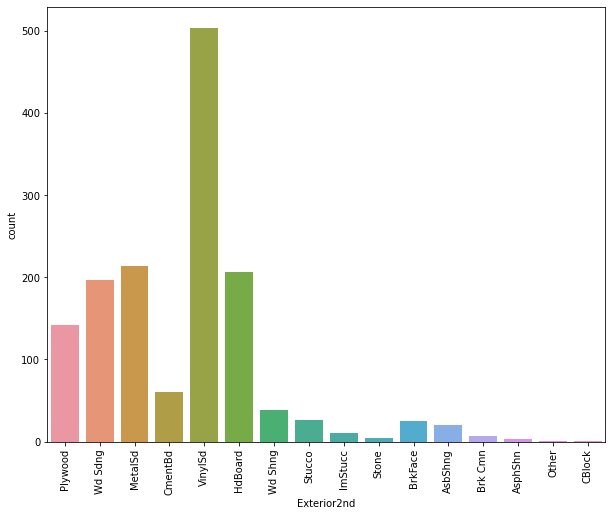

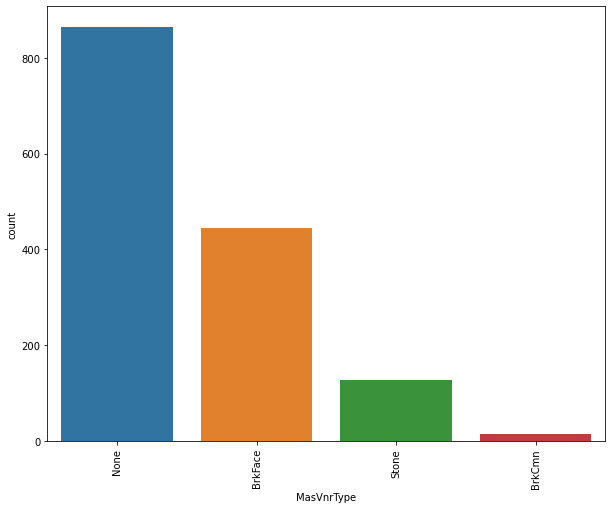

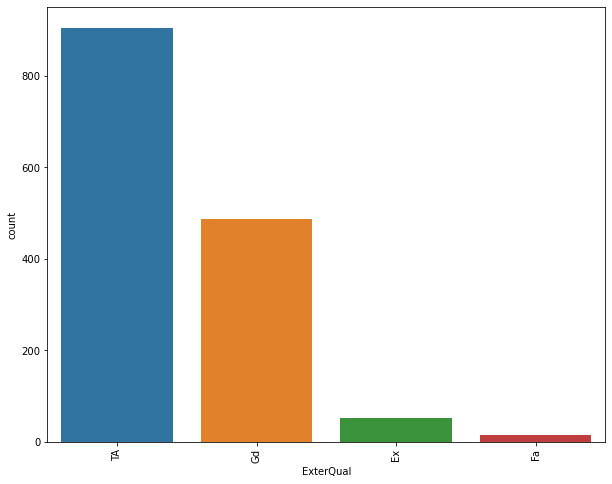

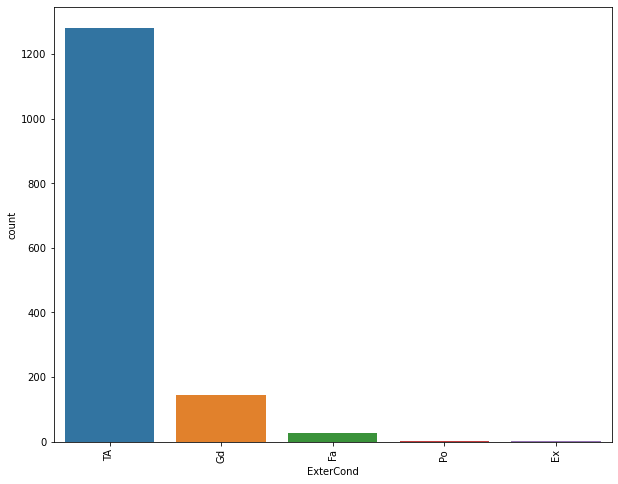

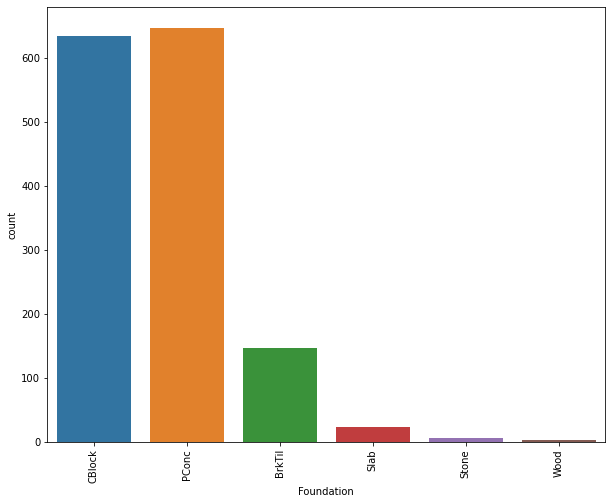

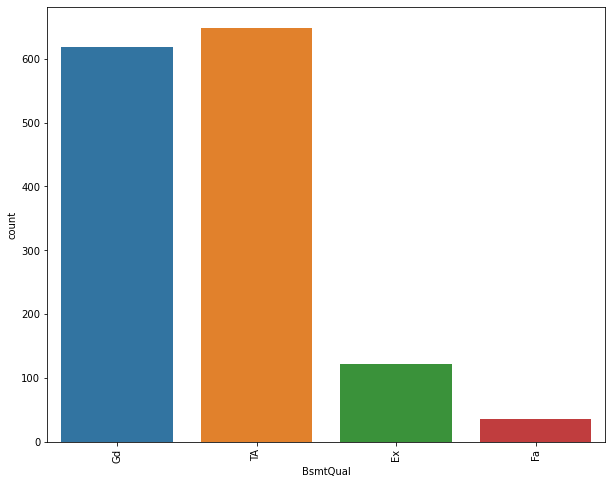

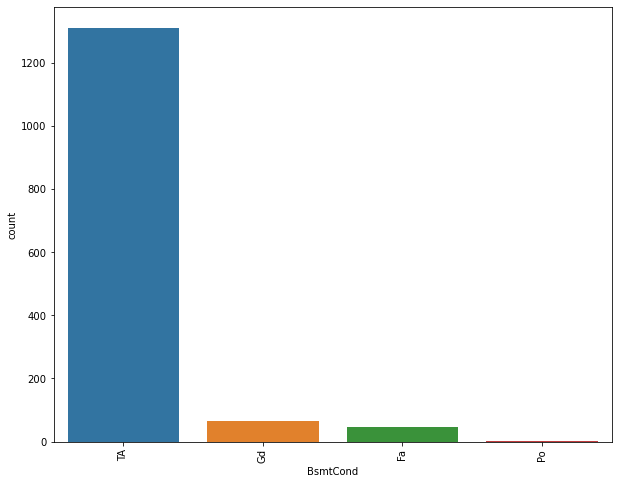

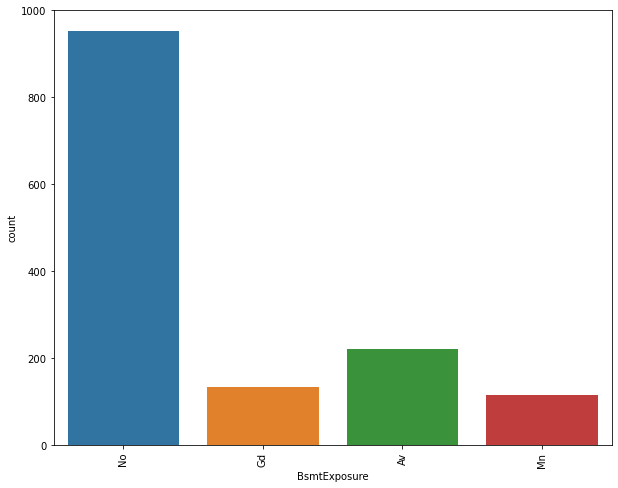

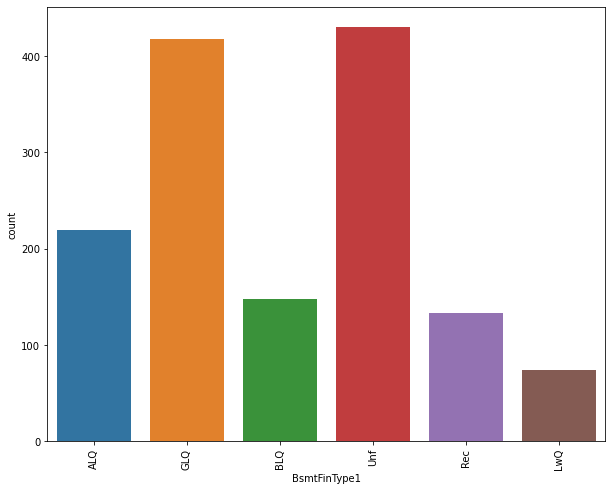

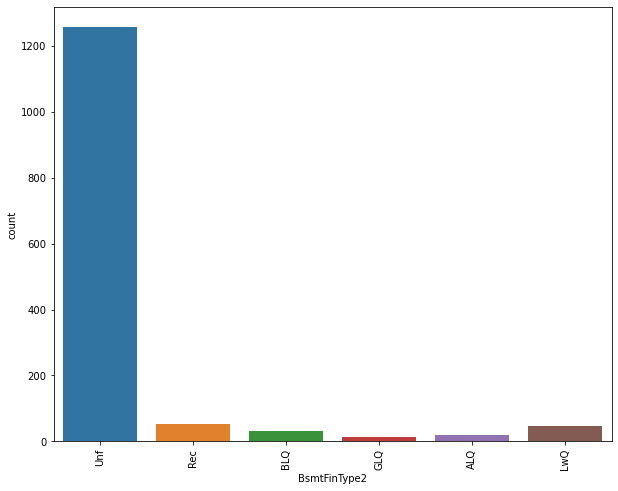

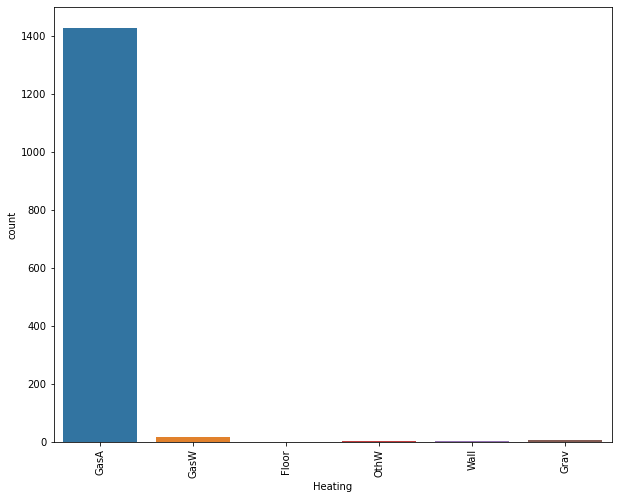

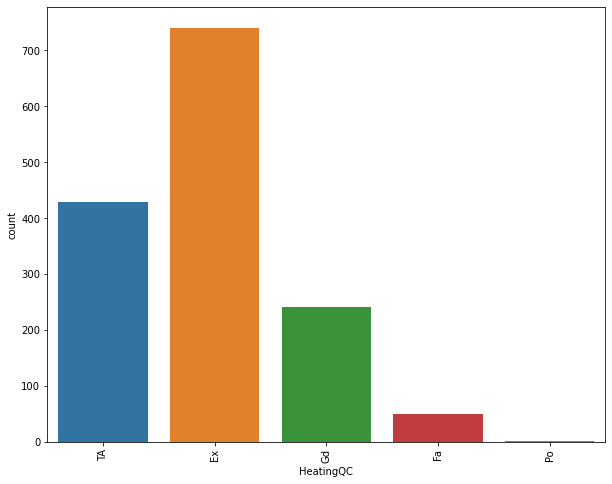

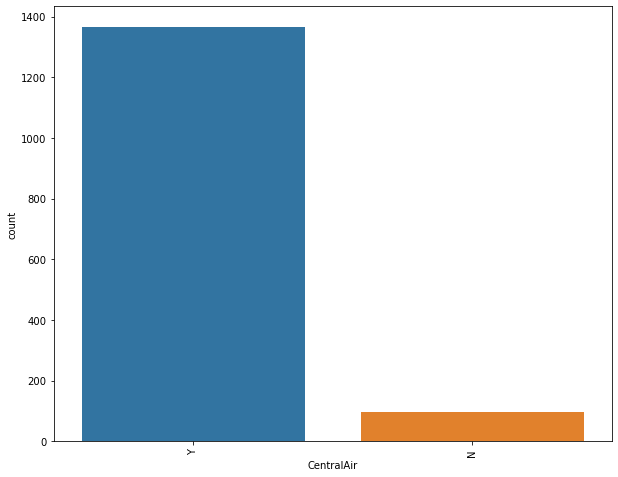

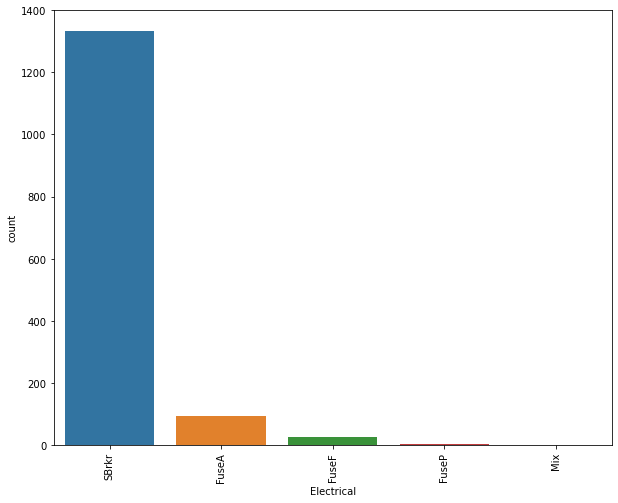

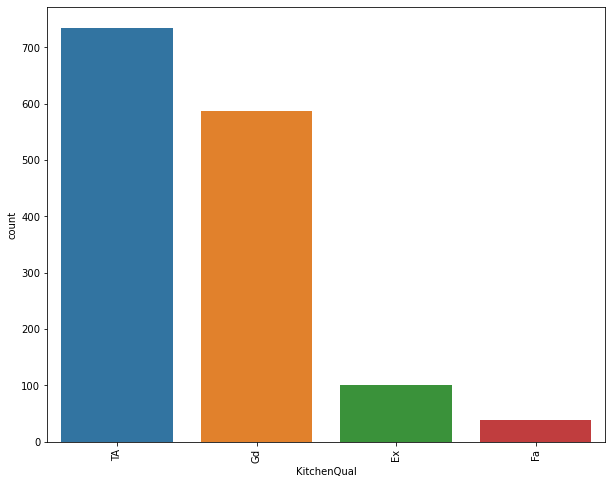

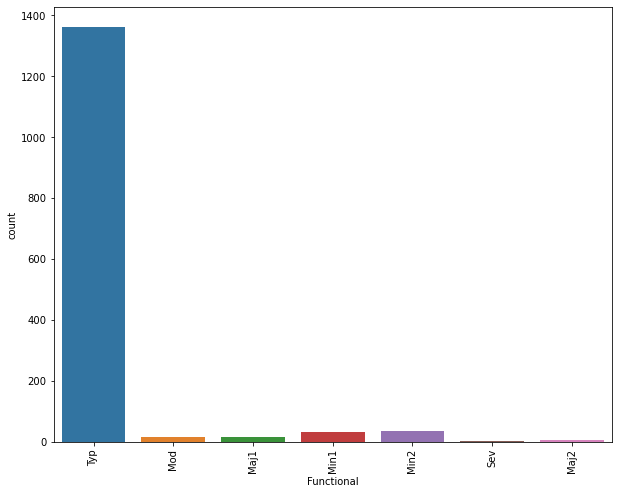

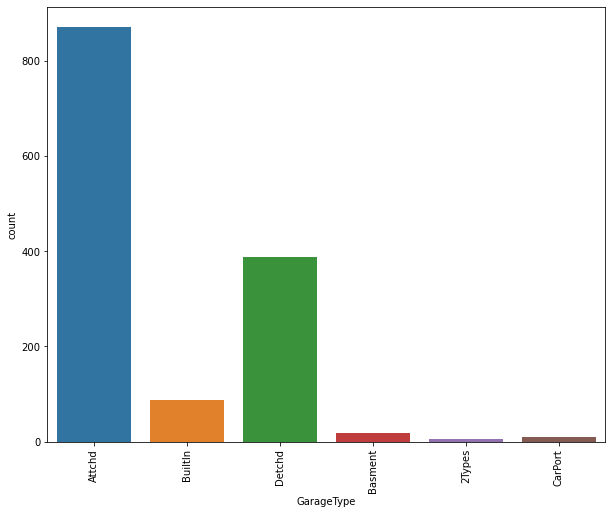

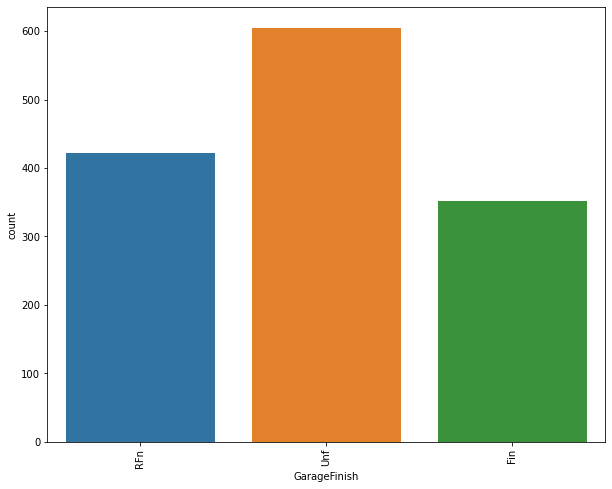

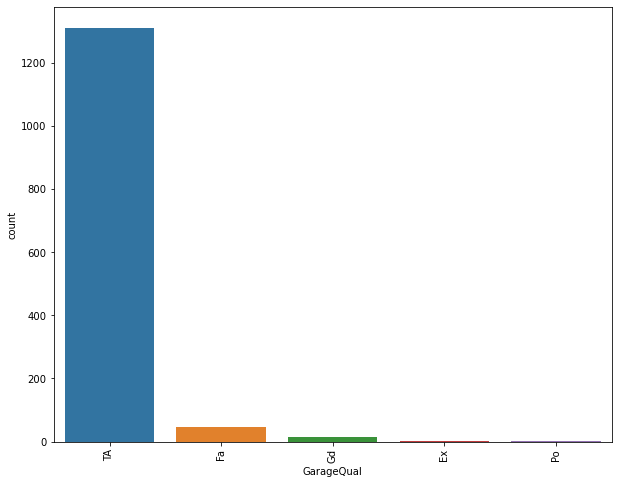

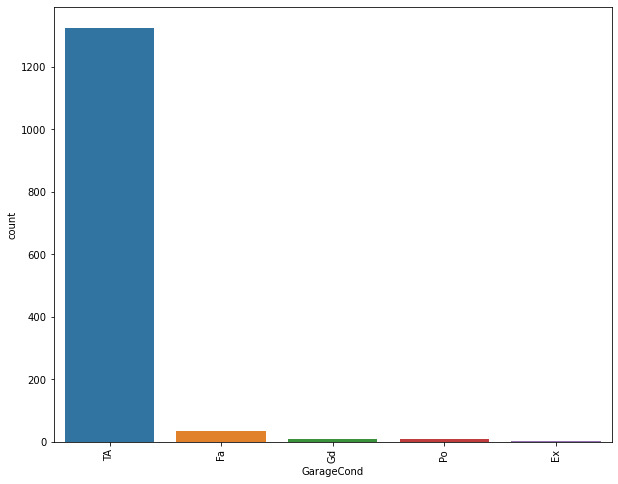

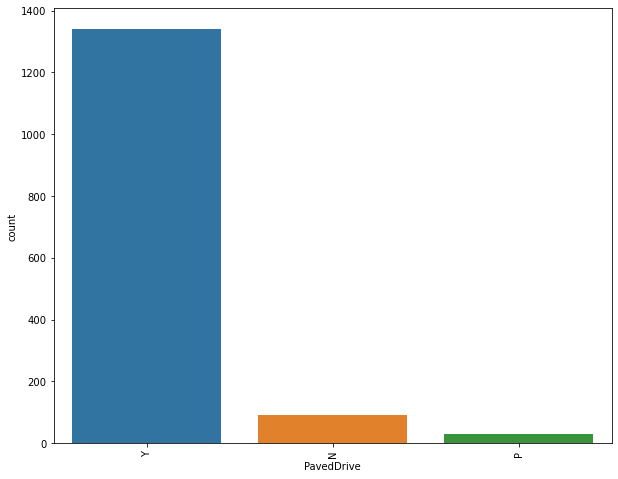

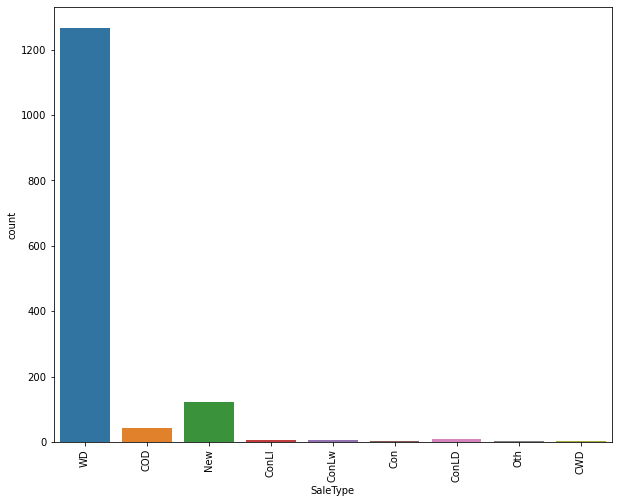

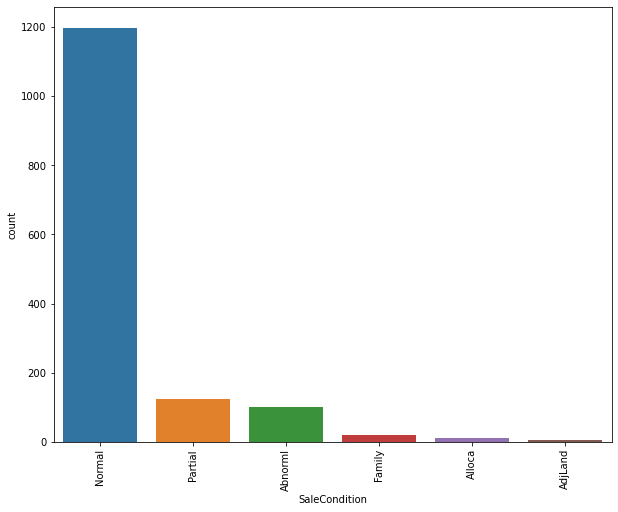

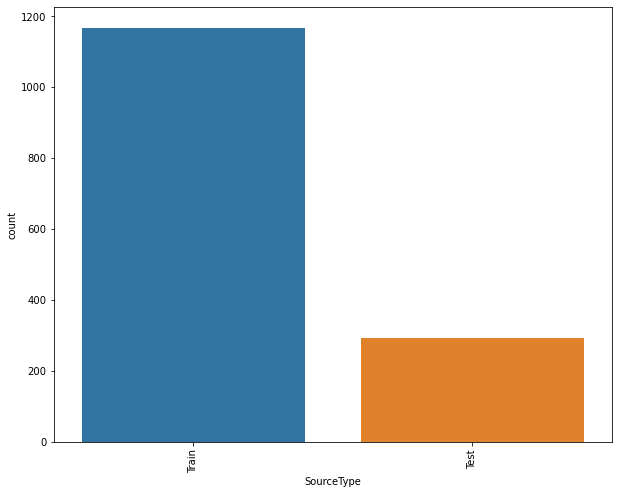

In [88]:
for col in categorical_columns:
    plt.figure(figsize=(10,8))
    sns.countplot(combined_df[col])
    plt.xticks(rotation=90)
    plt.show()

Observations:
1. There are majority of the properties are belongs to 1-STORY 1946 & NEWER ALL STYLES and followed by 2-STORY 1946 & NEWER
2. The quality of overall material and finish of the house is mostly average and followed by above average.
3. Majority of the properties are having average condition.
4. Most of the properites does not have full bathroom in basement and the second higest is with one bathroom at basement.
5.Majority of the properites does not have half bathrooms at basement.
6. Most of the properties are having 2 bathrooms above the basement and follwed by few properties with 1 bathroom.
7. Mostly there is no half bathrooms above basement and some properties with 1 half bathrooms.
8. Majority of the properites are having 3 bedrooms above the grade.
9. 1 kitchen is available for most of the properties.
10. Most of the properties are having 6 rooms above the basement and followed by properties with 7 rooms.
11. Most of the properties are having no fire place and followed by 1 fire place.
12. Most of the properites are with grage size of 2 cars.
13. Most of the properties are from the Residential Low Density zone.
14. Most of the properites are having paved street to the property.
15. Most of the properties are in regular shape
16. Majority of the properties are in near flat same level land counter
17. Almost the proerties are having all public utilities available at the property.
18. Majority of the properties are belongs to indie lot.
19. Majority of the properties are having gentle slope.
20. Most of the properites are Single-family Detached type of dwelling.
21. Most of the properties are belongs to 1 story house style
22. Majority of the properites are having Gable style roofs.
23. Mostly the roof material is Standard (Composite) Shingle.
24. Mostly the exterior covering is Vinyl Siding.
25. Most of the properties are with average quality of the material on the exterior.
26. Most of the properties are with average exterior condition.
27. Mostly the properties are having foundation type as Poured Contrete or Cinder Block.
28. Most of the time, the height of basement is average and good.
29. Most of the times the basement condition is Average.
30. Mostly the type of heating is Gas forced warm air furnace.
31. Most of the times Heating quality and condition is excellent.
32. Majority of the properties are having central Air conditioning.
33. Mostly the properties are having Standard Circuit Breakers & Romex electrical system.
34. Most of the times, the kitchen quality is average.
35. Mostly the Home functionality is typical.
36. Mostly the Garage is attached from home.
37. Most of the times the Interior finish of the garage is unfinished.
38. Mostly the garage quality is average.
39. Mostly the garage condistion is average.
40. Mostly the drive way is paved.
41. Mostly the type of sale is Warranty Deed - Conventional.
42. Mostly the sale condition is Normal.

## Bivariate analysis

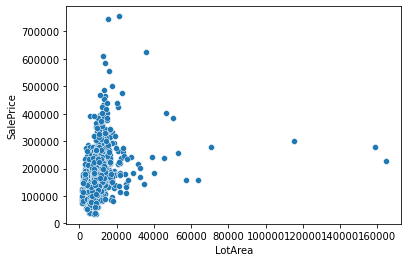

In [89]:
sns.scatterplot(train_df['LotArea'],train_df['SalePrice'])
plt.show()

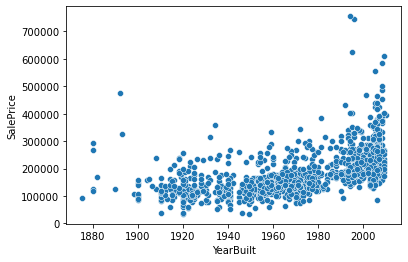

In [90]:
sns.scatterplot(train_df['YearBuilt'],train_df['SalePrice'])
plt.show()

The above plot shows that the price of the property is more when the age of the property is less.

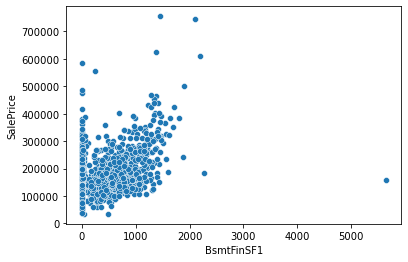

In [91]:
sns.scatterplot(train_df['BsmtFinSF1'],train_df['SalePrice'])
plt.show()

When the basemenst finished square feet is high, the price also high.

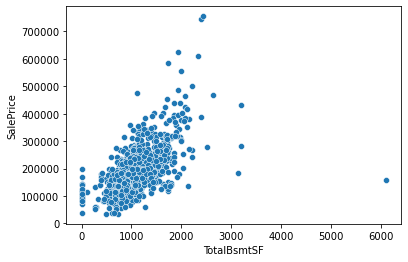

In [92]:
sns.scatterplot(train_df['TotalBsmtSF'],train_df['SalePrice'])
plt.show()

The above plot shows that when the total basement square feet is more the price of the property also high.

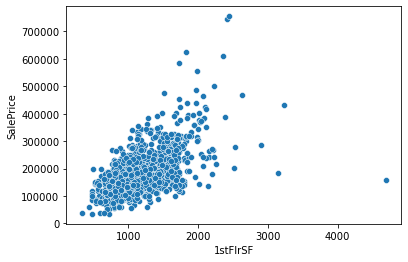

In [93]:
sns.scatterplot(train_df['1stFlrSF'],train_df['SalePrice'])
plt.show()

The above plot shows that when the 1st floor square feet is more the price of the property also high.

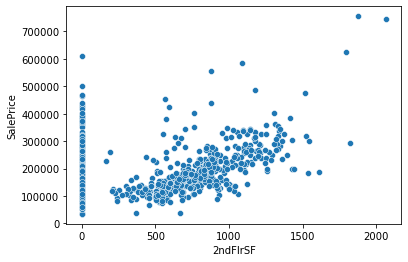

In [94]:
sns.scatterplot(train_df['2ndFlrSF'],train_df['SalePrice'])
plt.show()

The above plot shows that when the 2nd floor square feet is more the price of the property also high.

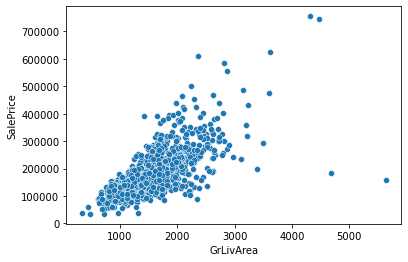

In [95]:
sns.scatterplot(train_df['GrLivArea'],train_df['SalePrice'])
plt.show()

The above plot shows that when the living area square feet is more the price of the property also high.

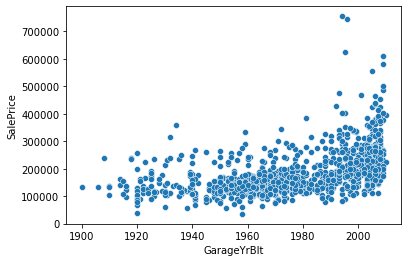

In [96]:
sns.scatterplot(train_df['GarageYrBlt'],train_df['SalePrice'])
plt.show()

The above plot shows that when the garage year built is recent then the price of the property also high.

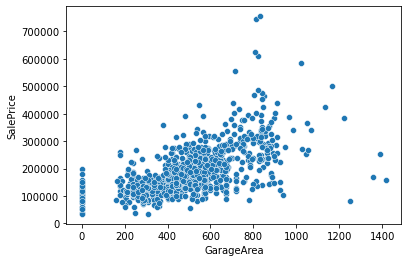

In [97]:
sns.scatterplot(train_df['GarageArea'],train_df['SalePrice'])
plt.show()

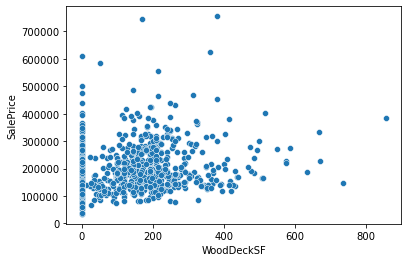

In [98]:
sns.scatterplot(train_df['WoodDeckSF'],train_df['SalePrice'])
plt.show()

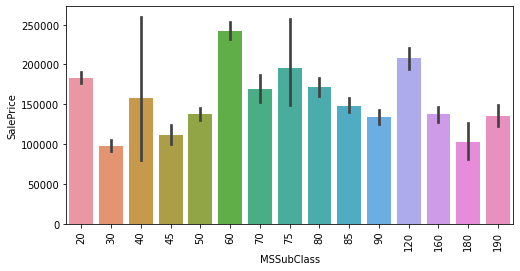

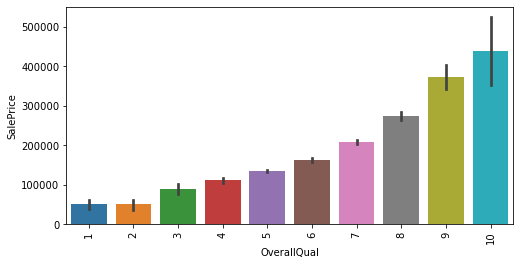

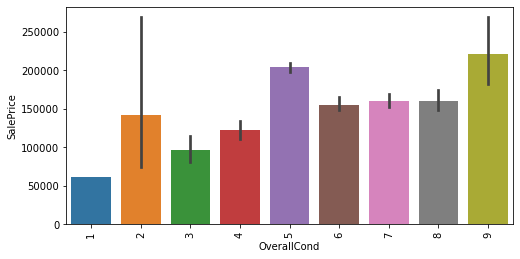

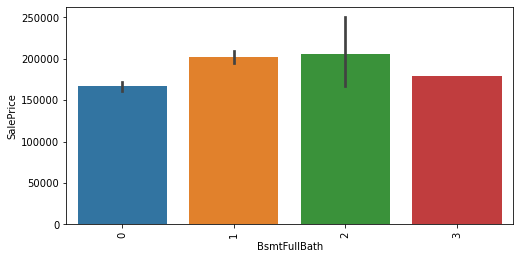

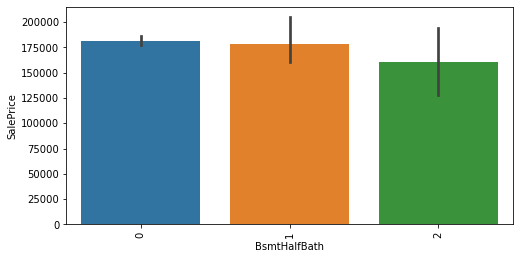

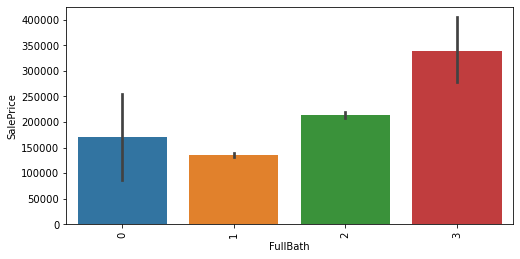

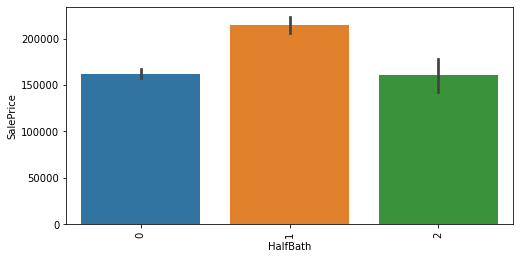

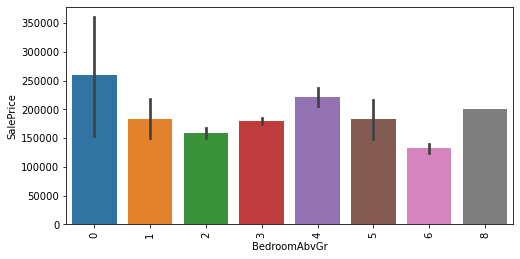

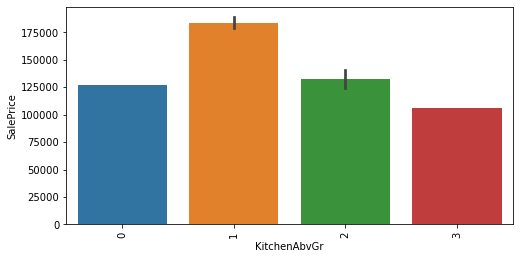

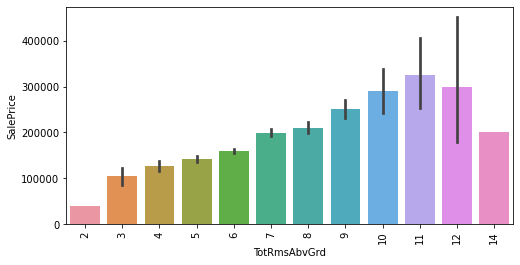

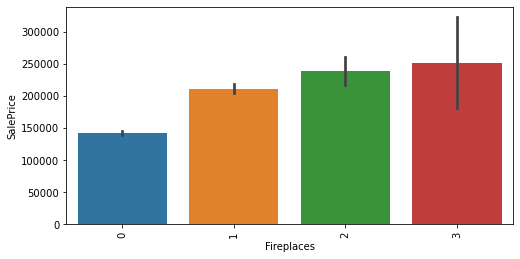

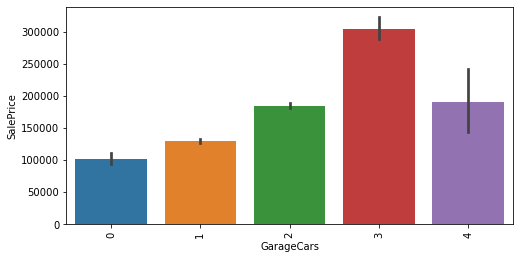

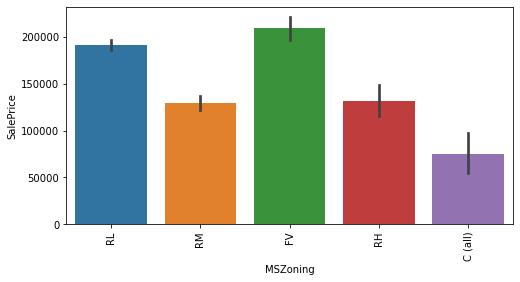

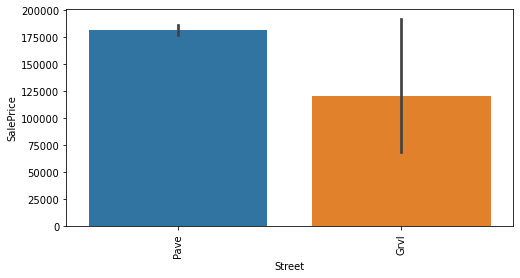

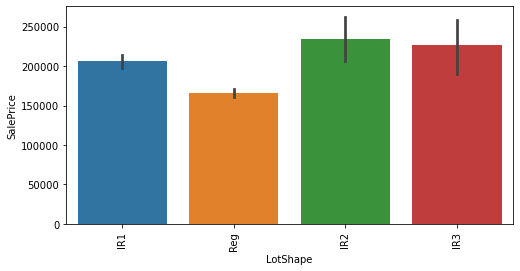

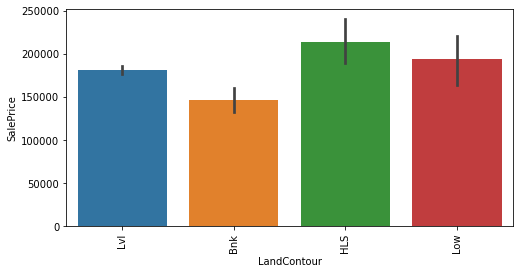

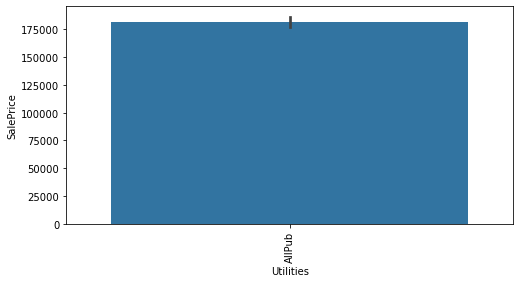

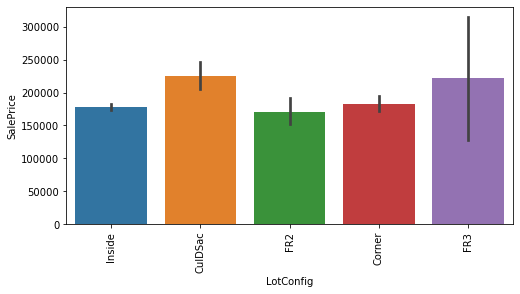

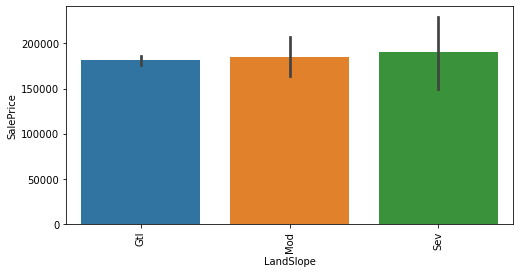

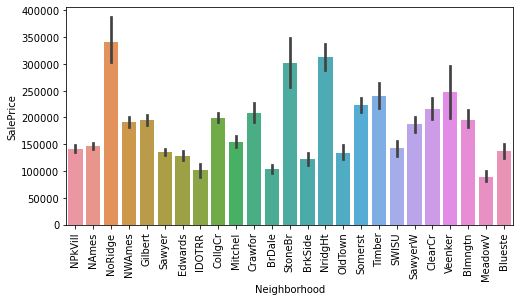

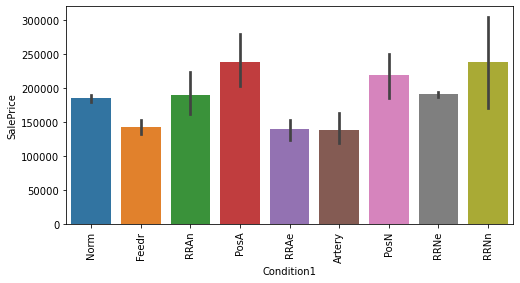

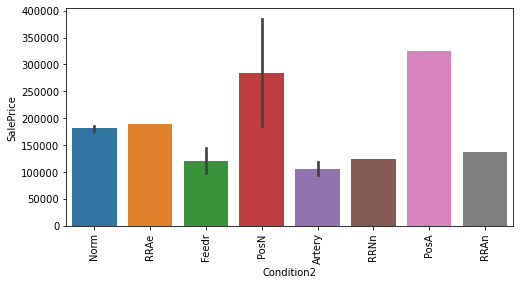

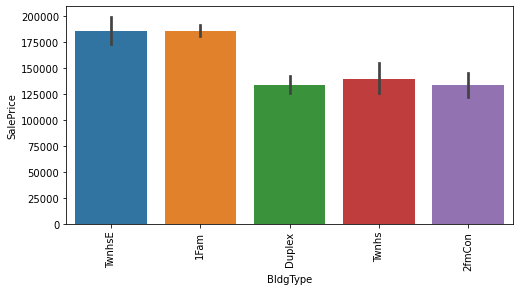

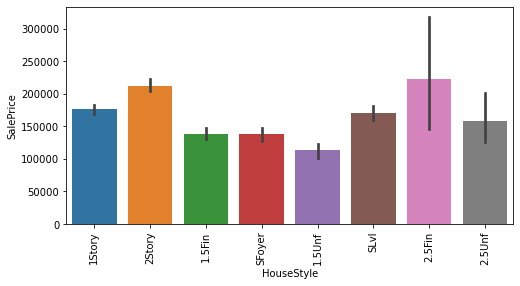

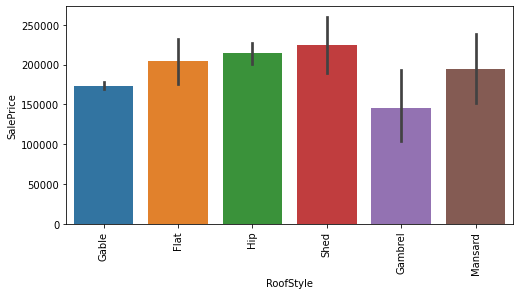

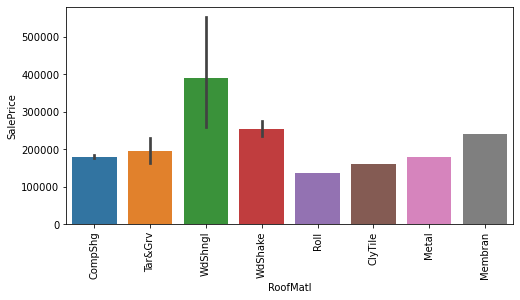

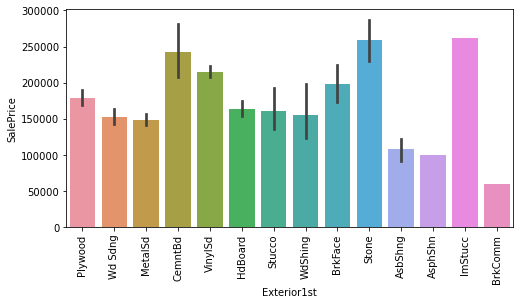

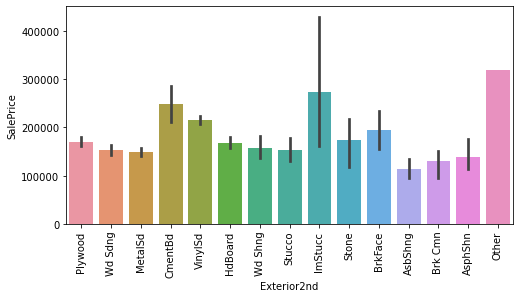

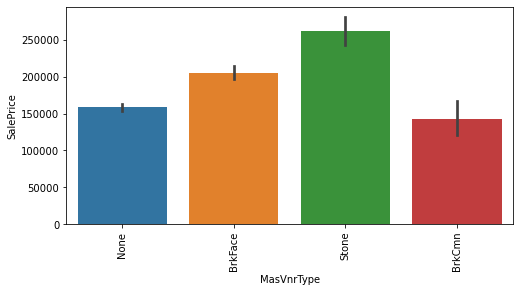

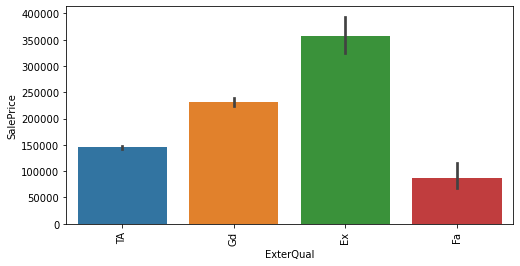

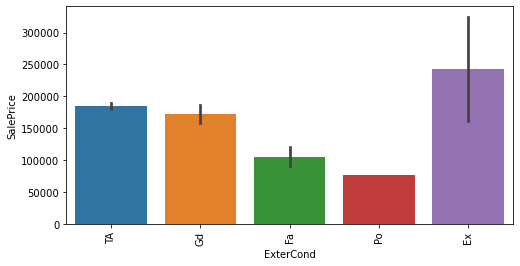

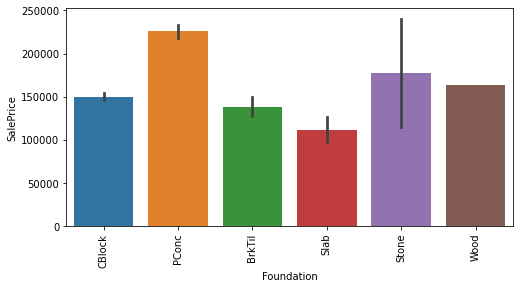

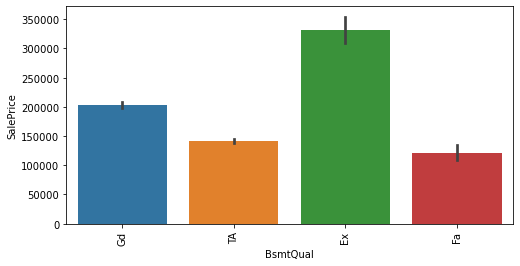

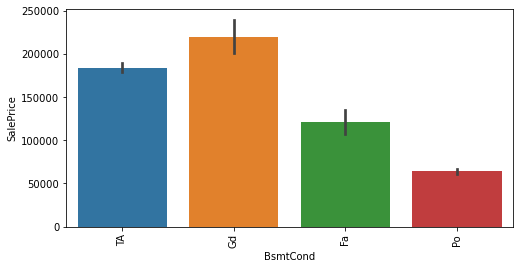

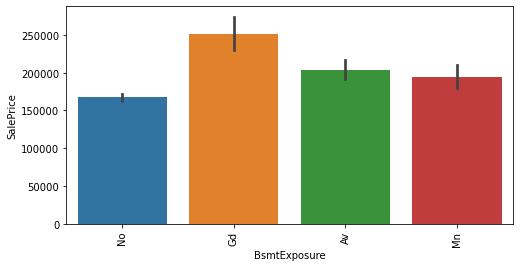

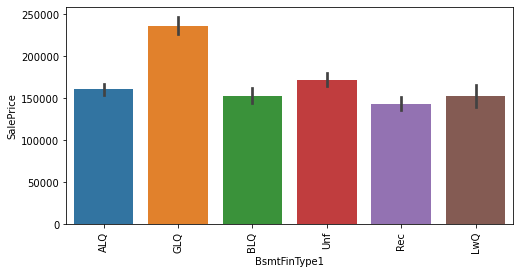

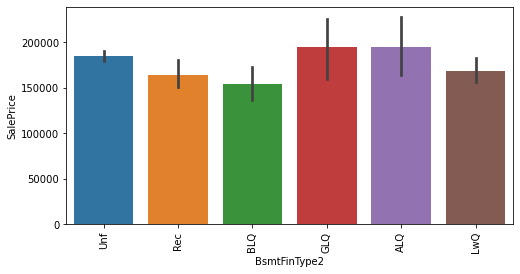

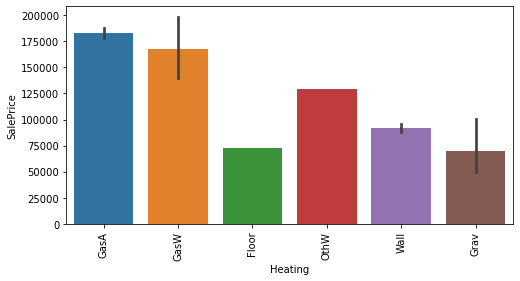

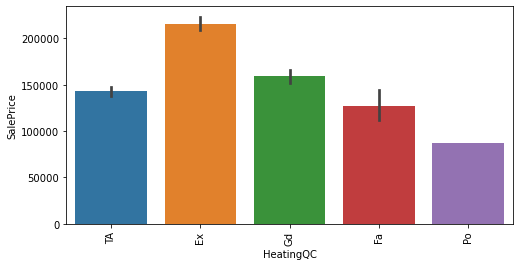

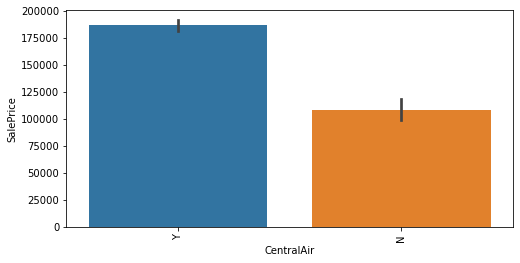

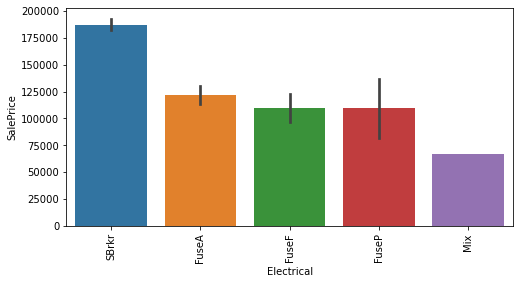

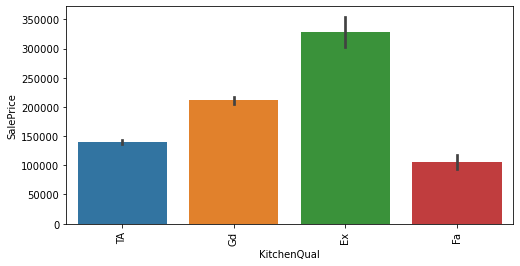

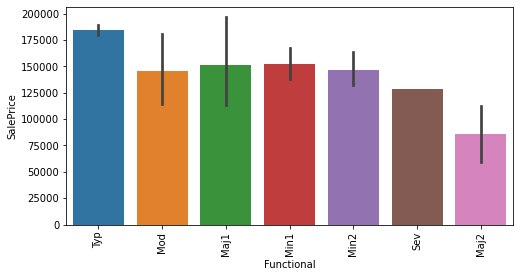

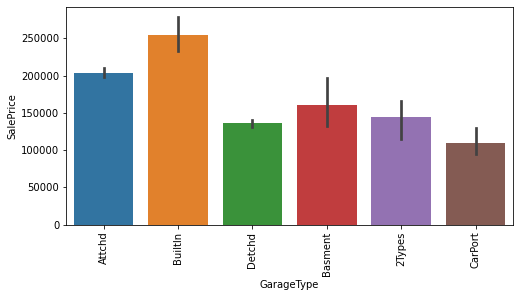

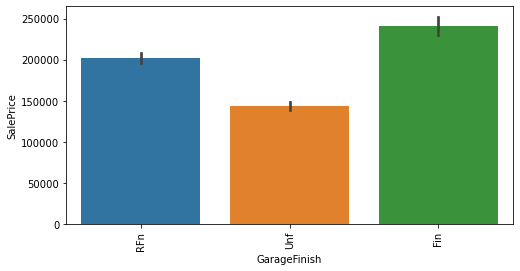

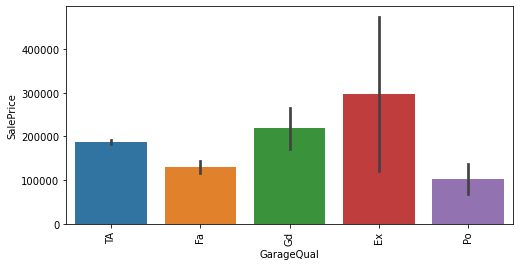

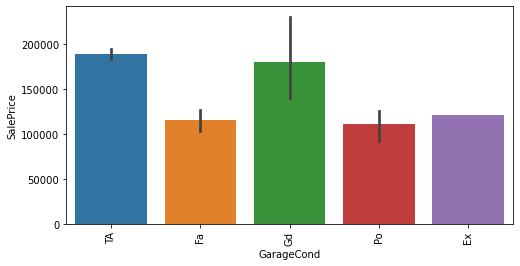

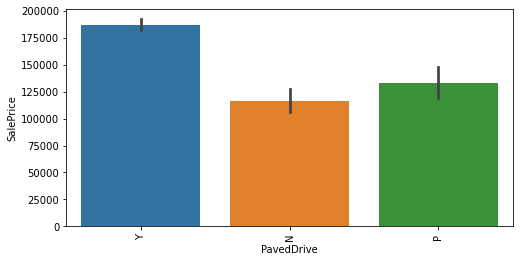

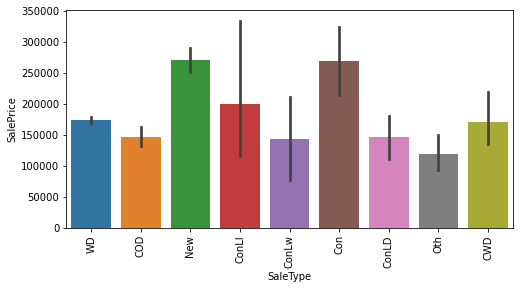

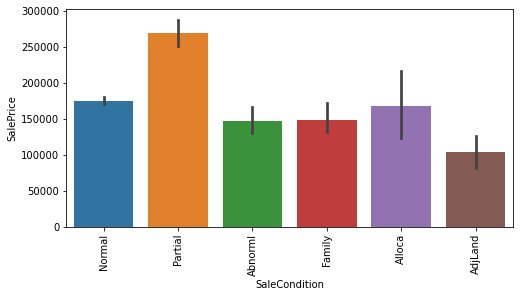

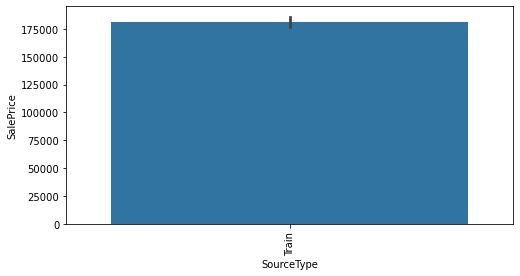

In [99]:
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.barplot(train_df[col],train_df['SalePrice'])
    plt.xticks(rotation=90)
    plt.show()

Observations:
1. When the type of property is 2-STORY 1946 & NEWER the price is higher and when the type is 1-STORY 1945 & OLDER the price is low.
2. When the overall material and finish of the house is excellent, the price is high.
3. When the garage size is big, the price of the property is high.
4. The price of the property is higher in the zones of Floating Village Residential and Residential Low Density.
5. Almost all the properties are having all public utilities available.
6. When the lot configuration is Cul-de-sac and Frontage on 3 sides of property, the the price of the property is high.
7. When the type of house is Frontage on 3 sides of property and Two story, then the price is more.
8. When the roof material is Wood Shingles then the price is more.
9. When the Exterior covering is Stone and Imitation Stucco the price of the house is higher.
10. When the Masonry veneer type is Stone, the price of the property is high.
11. When the quality of the material on the exterior is excellent, the price is higher.
12. When the present condition of the material on the exterior is excellent, the price of the property is high.
13. When the type of the foundation is Poured Contrete then the price is higher.
14. When the height of the basement is excellent, the price of the property is high.
15. When the basement finished area is Good Living Quarters, the price of the property is higher.
16. When the garage type is Built-In (Garage part of house - typically has room above garage), the price is higher.
17. When the garage quality is excellent, the price is higher.
18. When the sale type is Contract 15% Down payment regular terms and Home just constructed and sold then the price is higher.
19. When the sale condition is partial(Home was not completed when last assessed (associated with New Homes)), the price is higher.

Lets drop utilities as we have only one value for all the records and it will not contribute for any trend analysis.

In [179]:
combined_df.drop(['Utilities'],axis=1,inplace=True)

## Filling missing values

In [180]:
combined_df.isna().sum()[0:40]

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
dtype: int64

In [181]:
combined_df.isna().sum()[40:80]

1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType         0
GarageYrBlt        0
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
SourceType         0
dtype: int64

In [182]:
missing_value_features=['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [183]:
for f in missing_value_features:
    print(f)
    print("======================")
    print(combined_df[f].value_counts(),'\n')

LotFrontage
70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
111.000000      1
128.000000      1
138.000000      1
144.000000      1
160.000000      1
Name: LotFrontage, Length: 111, dtype: int64 

MasVnrType
2    872
1    445
3    128
0     15
Name: MasVnrType, dtype: int64 

MasVnrArea
0.000000      861
72.000000       8
103.685262      8
180.000000      8
108.000000      8
             ... 
530.000000      1
224.000000      1
768.000000      1
479.000000      1
415.000000      1
Name: MasVnrArea, Length: 328, dtype: int64 

BsmtQual
3    686
2    618
0    121
1     35
Name: BsmtQual, dtype: int64 

BsmtCond
3    1348
1      65
0      45
2       2
Name: BsmtCond, dtype: int64 

BsmtExposure
3    991
0    221
1    134
2    114
Name: BsmtExposure, dtype: int64 

BsmtFinType1
5    467
2    418
0    220
1    148
4    133
3     74
Name: BsmtFinType1, dtype: int64 

BsmtFinType2
5    1294
4      54
3      46
1      33
0      19
2  

In [184]:
mean_features=['LotFrontage','MasVnrArea']
mode_features=['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [185]:
from sklearn.impute import SimpleImputer
for col in mean_features:
    combined_df[col]=SimpleImputer(strategy='mean').fit_transform(combined_df[[col]])
for col in mode_features:
    combined_df[col]=SimpleImputer(strategy='most_frequent').fit_transform(combined_df[[col]])

In [186]:
combined_df.isna().sum().sum()

292

## Encoding the non-numeric values to numeric values

In [188]:
from sklearn.preprocessing import LabelEncoder
non_num_col.remove('Utilities')
for col in non_num_col:
    combined_df[col]=LabelEncoder().fit_transform(combined_df[col])
combined_df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SourceType
0,120,3,70.049958,4928,1,0,3,4,0,13,...,0,0,0,0,2,2007,8,4,128000.0,1
1,20,3,95.000000,15865,1,0,3,4,1,12,...,0,224,0,0,10,2007,8,4,268000.0,1
2,60,3,92.000000,9920,1,0,3,1,0,15,...,0,0,0,0,6,2007,8,4,269790.0,1
3,20,3,105.000000,11751,1,0,3,4,0,14,...,0,0,0,0,1,2010,0,4,190000.0,1
4,20,3,70.049958,16635,1,0,3,2,0,14,...,0,0,0,0,6,2009,8,4,215000.0,1


## Checking Outliers

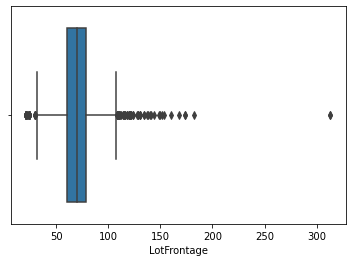

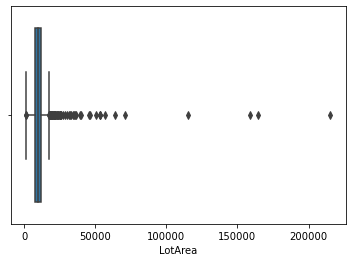

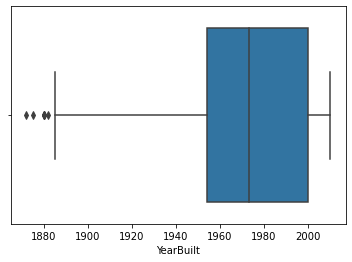

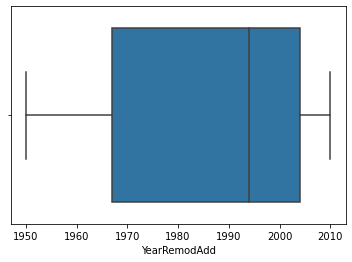

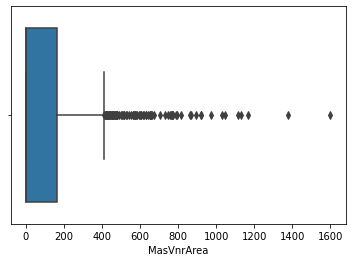

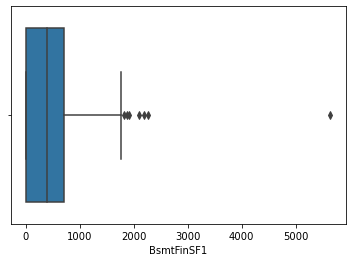

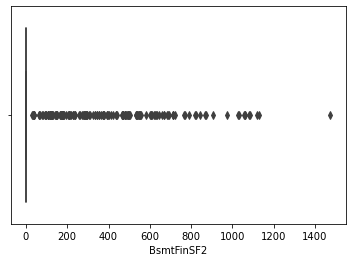

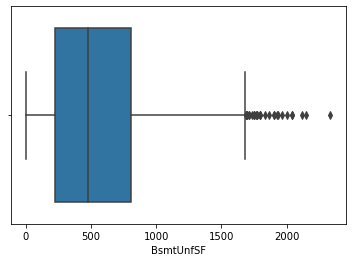

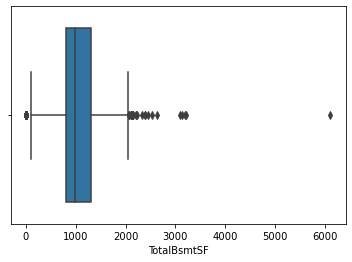

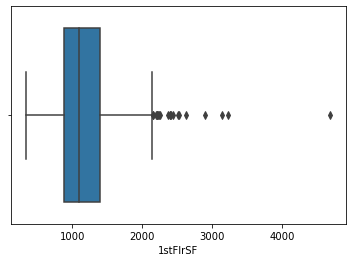

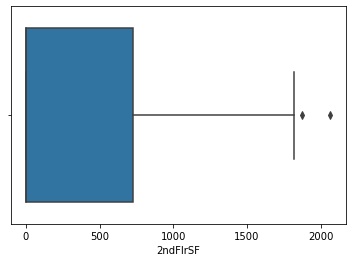

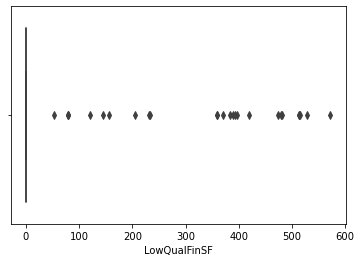

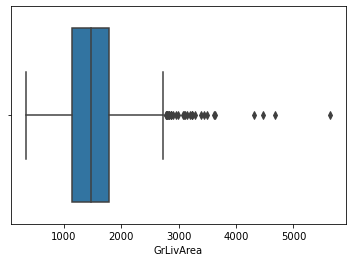

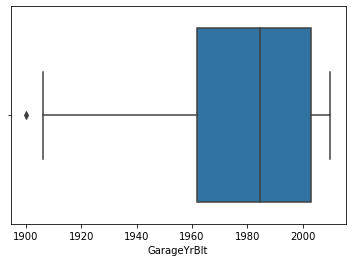

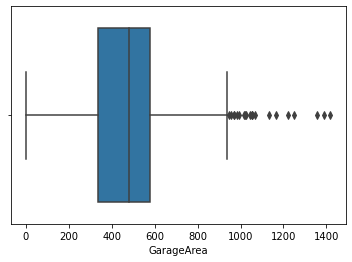

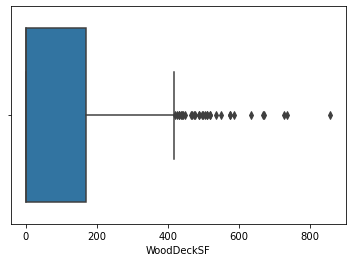

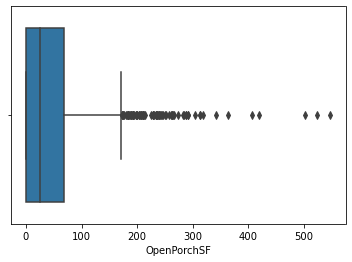

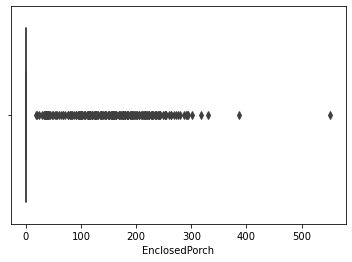

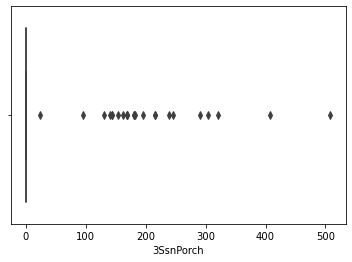

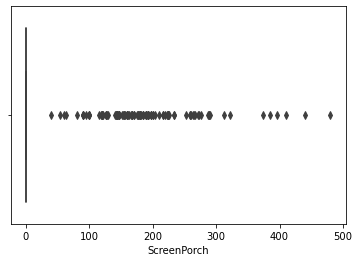

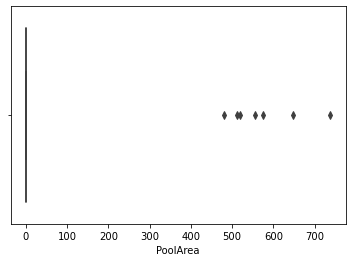

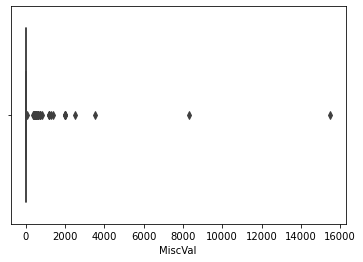

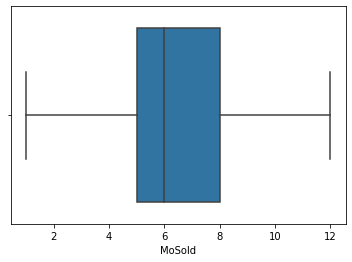

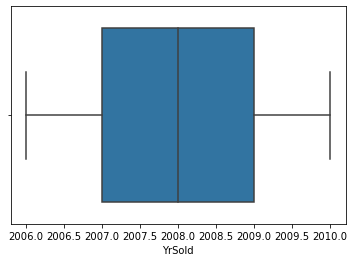

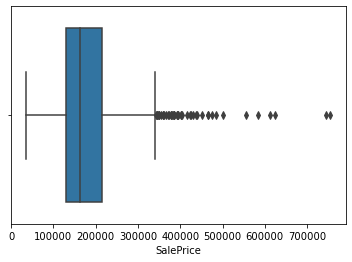

In [189]:
for col in numeric_col:
    sns.boxplot(combined_df[col])
    plt.show()

In [190]:
outliers_features=['LotFrontage','LotArea','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [191]:
from scipy.stats import zscore

In [242]:
score=zscore(combined_df[outliers_features])
filtering=(score<3).all(axis=1)
new_df=combined_df[filtering]
print(combined_df.shape,new_df.shape)

(1460, 75) (1168, 75)


In [243]:
data_loss=((combined_df.shape[0]-new_df.shape[0])/combined_df.shape[0])*100
data_loss

20.0

In [244]:
new_df.skew().sort_values()[:40]

Street          -24.134984
GarageCond       -5.400142
GarageQual       -4.635577
BsmtFinType2     -4.560101
Functional       -4.245519
SaleType         -4.040422
CentralAir       -3.619434
BsmtCond         -3.527538
LandContour      -3.470183
PavedDrive       -3.334587
Electrical       -3.119316
SaleCondition    -2.824389
ExterCond        -2.644961
MSZoning         -1.693873
ExterQual        -1.680597
KitchenQual      -1.433066
SourceType       -1.427592
BsmtQual         -1.352827
LotConfig        -1.251340
BsmtExposure     -1.250966
Exterior1st      -0.758066
GarageYrBlt      -0.754403
Exterior2nd      -0.727660
LotShape         -0.717843
YearBuilt        -0.624435
YearRemodAdd     -0.505782
GarageFinish     -0.490492
GarageCars       -0.366756
Foundation       -0.119593
FullBath         -0.100605
BsmtFinType1     -0.082484
GarageArea       -0.065889
MasVnrType       -0.054366
LotFrontage      -0.002121
PoolArea          0.000000
TotalBsmtSF       0.056137
OverallQual       0.081474
N

In [245]:
new_df.skew().sort_values()[40:80]

MoSold            0.229733
HouseStyle        0.319378
TotRmsAbvGrd      0.490632
HeatingQC         0.502917
GrLivArea         0.554974
BsmtFinSF1        0.632220
1stFlrSF          0.635597
BsmtFullBath      0.687829
Fireplaces        0.705456
OverallCond       0.733136
2ndFlrSF          0.744059
HalfBath          0.760730
BsmtUnfSF         0.800447
GarageType        0.815442
WoodDeckSF        0.996634
SalePrice         1.211980
LotArea           1.265558
MSSubClass        1.347457
OpenPorchSF       1.528989
MasVnrArea        1.662706
RoofStyle         1.742614
BldgType          2.062628
Condition1        2.894046
EnclosedPorch     2.940699
BsmtHalfBath      4.308225
KitchenAbvGr      4.350761
BsmtFinSF2        4.383926
ScreenPorch       4.783467
LandSlope         5.415116
MiscVal           7.825742
Heating          10.609977
RoofMatl         11.892130
Condition2       15.491148
LowQualFinSF     17.572994
3SsnPorch        34.176015
dtype: float64

In [246]:
skewed_features=['GrLivArea','BsmtFinSF1','1stFlrSF','2ndFlrSF','BsmtUnfSF','WoodDeckSF','LotArea','OpenPorchSF','MasVnrArea','EnclosedPorch','BsmtFinSF2','ScreenPorch','MiscVal','LowQualFinSF','3SsnPorch']

In [247]:
from sklearn.preprocessing import PowerTransformer

In [248]:
new_df[skewed_features]=PowerTransformer().fit_transform(new_df[skewed_features])

In [249]:
print(new_df[skewed_features].skew().sort_values())

BsmtFinSF1       -0.395398
BsmtUnfSF        -0.273351
GrLivArea        -0.006164
1stFlrSF         -0.002523
OpenPorchSF       0.007111
WoodDeckSF        0.098818
LotArea           0.135042
2ndFlrSF          0.310680
MasVnrArea        0.435531
EnclosedPorch     2.381806
BsmtFinSF2        3.153600
ScreenPorch       4.374289
MiscVal           5.797800
LowQualFinSF     17.021969
3SsnPorch        34.176015
dtype: float64


PowerTransformer helped to reduce the skewness as much as possible.

## Checking Multicolinearity

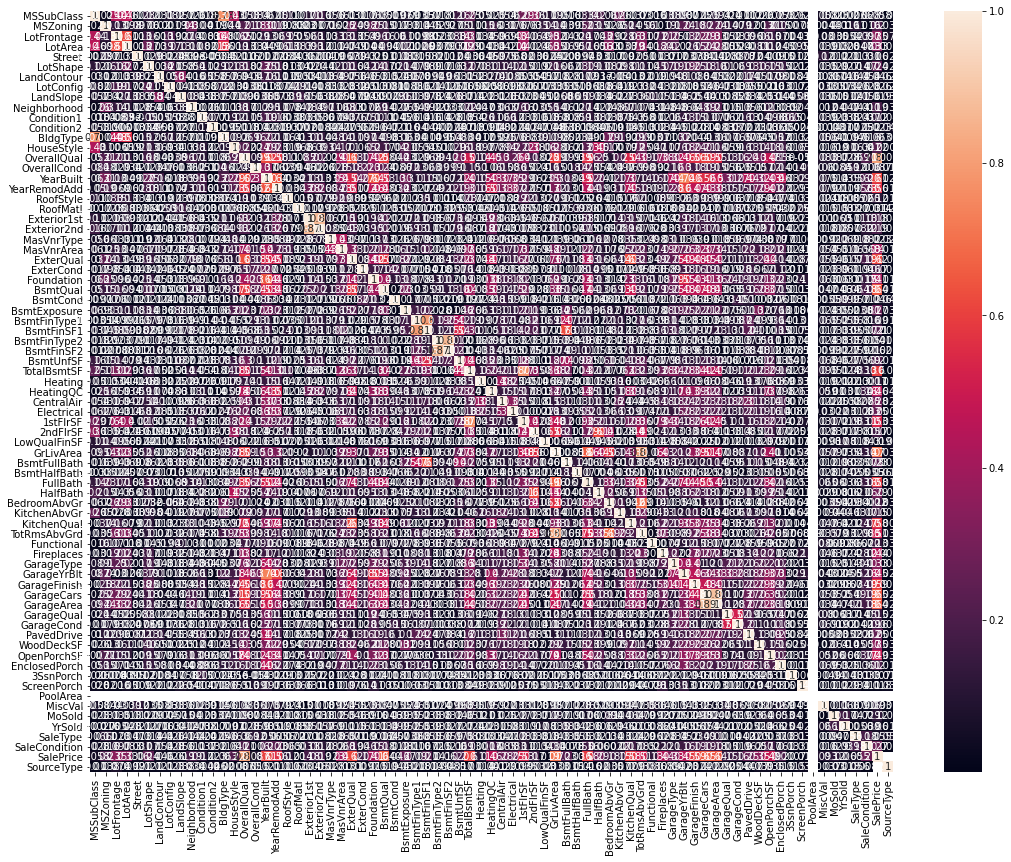

In [250]:
plt.figure(figsize=(18,14))
sns.heatmap(new_df.corr().abs(),annot=True)
plt.show()

we will handle multi collinearity problem using VIF factor

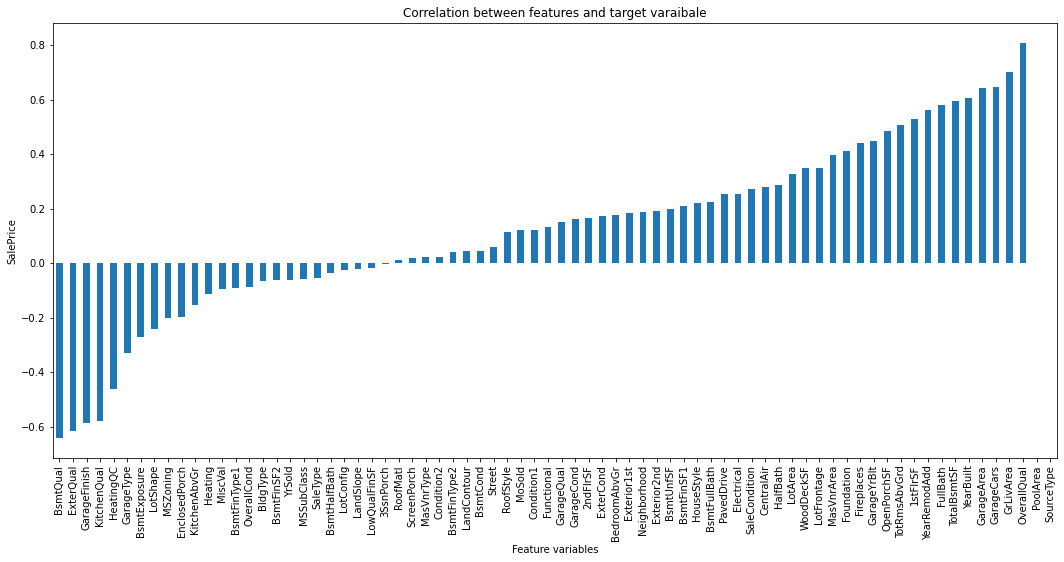

In [251]:
plt.figure(figsize=(18,8))
new_df.corr()['SalePrice'].sort_values().drop(['SalePrice']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

The above plot shows that the feature 3SsnPorch does not have relationship with the target variable price.So lets drop this feature.

In [252]:
new_df.drop(['3SsnPorch'],axis=1,inplace=True)

In [253]:
train_df1=new_df[new_df['SourceType']==1]

In [254]:
train_df1.shape

(923, 74)

In [255]:
test_df1=new_df[new_df['SourceType']==0]

In [256]:
test_df1.shape

(245, 74)

In [266]:
X=new_df.drop(['SalePrice'],axis=1)

In [267]:
from sklearn.preprocessing import StandardScaler
X_sc=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

In [268]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X.columns
vif.sort_values(by='VIF values',ascending=False)[0:40]

,VIF values,Features
43,32.280634,GrLivArea
41,22.332248,2ndFlrSF
40,20.139621,1stFlrSF
35,9.451725,TotalBsmtSF
16,8.885856,YearBuilt
31,7.986168,BsmtFinSF1
0,7.446399,MSSubClass
57,6.428723,GarageCars
12,6.338625,BldgType
34,6.335329,BsmtUnfSF


In [269]:
vif.sort_values(by='VIF values',ascending=False)[40:80]

,VIF values,Features
61,1.586921,PavedDrive
60,1.586665,GarageCond
53,1.585819,Fireplaces
29,1.564352,BsmtExposure
22,1.555478,MasVnrType
64,1.493381,EnclosedPorch
1,1.456209,MSZoning
39,1.426636,Electrical
62,1.376954,WoodDeckSF
8,1.351590,LandSlope


Lets drop PoolArea, 1stFlrSF,2ndFlrSF,GrLivArea

In [270]:
X_sc.drop(['GrLivArea'],axis=1,inplace=True)

In [271]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)[0:40]

,VIF values,Features
35,9.353692,TotalBsmtSF
16,8.885340,YearBuilt
31,7.986161,BsmtFinSF1
0,7.316449,MSSubClass
40,6.707238,1stFlrSF
56,6.416010,GarageCars
41,6.355403,2ndFlrSF
34,6.331418,BsmtUnfSF
12,6.215966,BldgType
57,5.786198,GarageArea


In [272]:
vif.sort_values(by='VIF values',ascending=False)[40:80]

,VIF values,Features
60,1.582185,PavedDrive
52,1.568932,Fireplaces
29,1.560282,BsmtExposure
22,1.549387,MasVnrType
63,1.489315,EnclosedPorch
1,1.456123,MSZoning
39,1.419922,Electrical
61,1.374499,WoodDeckSF
8,1.348927,LandSlope
36,1.321915,Heating


In [273]:
X_sc.drop(['PoolArea'],axis=1,inplace=True)

In [281]:
new_df.drop(['GrLivArea','PoolArea'],axis=1,inplace=True)

In [295]:
train_df1=new_df[new_df['SourceType']==1]
test_df1=new_df[new_df['SourceType']==0]

In [296]:
X=train_df1.drop(['SalePrice','SourceType'],axis=1)
X_test=test_df1.drop(['SalePrice','SourceType'],axis=1)
y=train_df1['SalePrice']
y_test=test_df1['SalePrice']

In [297]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(923, 70)
(245, 70)
(923,)
(245,)


## Model Building

In [300]:
X_sc=StandardScaler().fit_transform(X)

In [308]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
import xgboost
from xgboost import XGBRegressor

In [302]:
m_acc=0
b_rs=0
for i in range(1,200):
    lr=LinearRegression()
    X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_val)
    acc=r2_score(y_val,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Accuracy: ",m_acc,"Best RS: ",b_rs)

Accuracy:  0.9115633901919696 Best RS:  79


In [303]:
X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.25,random_state=79)

In [309]:
lr=LinearRegression()
rf_reg=RandomForestRegressor()
gb_reg=GradientBoostingRegressor()
svr_reg=SVR()
ad_reg=AdaBoostRegressor()
dt_reg=DecisionTreeRegressor()
knn=KNeighborsRegressor()
xgb_reg=XGBRegressor()

In [310]:
models=[lr,rf_reg,gb_reg,svr_reg,knn,ad_reg,dt_reg,xgb_reg]

In [311]:
for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_val)
    print("Metrics for ",m)
    print("Train Accuracy: ",m.score(X_train,y_train))
    print("Test Accuracy: ",r2_score(y_val,y_pred))
    print("Mean Absolute Error: ",mean_absolute_error(y_val,y_pred))
    print("Mean Squared Error: ",mean_squared_error(y_val,y_pred))
    print("Root Mean Sqaured Error: ",np.sqrt(mean_squared_error(y_val,y_pred)),'\n')

Metrics for  LinearRegression()
Train Accuracy:  0.8800790076492924
Test Accuracy:  0.9115633901919696
Mean Absolute Error:  14581.027593938961
Mean Squared Error:  372650915.4735888
Root Mean Sqaured Error:  19304.168344520538 

Metrics for  RandomForestRegressor()
Train Accuracy:  0.9776506318334861
Test Accuracy:  0.8713691797161692
Mean Absolute Error:  16198.190606060607
Mean Squared Error:  542019792.9447944
Root Mean Sqaured Error:  23281.318539653083 

Metrics for  GradientBoostingRegressor()
Train Accuracy:  0.9692510772680345
Test Accuracy:  0.8998048927168019
Mean Absolute Error:  14240.236522739553
Mean Squared Error:  422198437.2321315
Root Mean Sqaured Error:  20547.467903178032 

Metrics for  SVR()
Train Accuracy:  -0.056987997911418065
Test Accuracy:  -0.05140957180533978
Mean Absolute Error:  49574.95571197632
Mean Squared Error:  4430390766.012562
Root Mean Sqaured Error:  66561.18062363799 

Metrics for  KNeighborsRegressor()
Train Accuracy:  0.8507443294702121
Test 

In [312]:
for m in models:
    print("Cross validation score for ",m,cross_val_score(m,X_sc,y,cv=5).mean())

Cross validation score for  LinearRegression() 0.8579385107992555
Cross validation score for  RandomForestRegressor() 0.850187736811565
Cross validation score for  GradientBoostingRegressor() 0.8687004891695448
Cross validation score for  SVR() -0.05563981260626325
Cross validation score for  KNeighborsRegressor() 0.7900954581490078
Cross validation score for  AdaBoostRegressor() 0.7858756640243303
Cross validation score for  DecisionTreeRegressor() 0.6519447185285527
Cross validation score for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
   

Based on the model accuracy and cross validation XGBRegressor is having less difference. So lets select XGBRegressor as the final model to our dataset.

### Hyper Parameter tuning

In [322]:
from sklearn.model_selection import GridSearchCV
param={'learning_rate':[0.01,0.1,1],'gamma':[0,0.01,0.1],'max_depth':[6,8,9,11],'n_estimators':[150,180,210,250]}
grd_srch=GridSearchCV(XGBRegressor(),param_grid=param,cv=5,n_jobs=-1)
grd_srch.fit(X_train,y_train)
print(grd_srch.best_estimator_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [323]:
m_acc=0
b_rs=0
for i in range(1,30):
    final_model=XGBRegressor(learning_rate=0.1,n_estimators=250,random_state=i)
    final_model.fit(X_train,y_train)
    y_pred=final_model.predict(X_val)
    acc=r2_score(y_val,y_pred)
    if(m_acc<acc):
        m_acc=acc
        b_rs=i
print("Best Accuracy: ",m_acc,"Best RS: ",b_rs)

Best Accuracy:  0.8917004973197347 Best RS:  1


In [324]:
final_model_reg=XGBRegressor(learning_rate=0.1,n_estimators=250,random_state=1)
final_model_reg.fit(X_train,y_train)
y_pred=final_model_reg.predict(X_val)
print("Train Accuracy: ",final_model_reg.score(X_train,y_train))
print("Test Accuracy: ",r2_score(y_val,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_val,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_val,y_pred))
print("Root Mean Sqaured Error: ",np.sqrt(mean_squared_error(y_val,y_pred)))

Train Accuracy:  0.9999313359444222
Test Accuracy:  0.8917004973197347
Mean Absolute Error:  15477.554450757576
Mean Squared Error:  456348438.8053803
Root Mean Sqaured Error:  21362.313517158676


In [325]:
import pickle

In [326]:
pickle.dump(final_model_reg,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/HousingPriceReg.pkl','wb'))

In [327]:
model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/HousingPriceReg.pkl','rb'))

In [334]:
prediction=model.predict(X_test)
result=pd.DataFrame({'Predicted':np.round(prediction)})
result.tail()

,Predicted
240,331507.0
241,340445.0
242,343236.0
243,350208.0
244,326525.0
